In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/Ecobee_Thermostat.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      110.000000            0.000000          1.000000   
2          1.724055       91.439104          249.441812          1.823878   
3          1.000000      342.000000            0.000000          1.000000   
4          2.516815       90.867308          150.827639          2.688981   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      110.000000            0.000000          1.000000      110.000000   
2       92.454965          253.612868          1.937463       93.483558   
3      342.000000            0.000000          1.000000      342.000000   
4       91.541993          160.705060          2.888469       92.277536   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000     60.000000   
1            0.000000     1.000000  ...        1.000000    110.000000   
2          255.733288     1.724055  ...        1.000000     78.000000   
3            0.000000     1.000000  ...        1.000000    342.000000   
4          169.944112     2.516815  ...        1.762943     98.655331   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.000000                 0.0          0.0        1.000000    110.000000   
2     0.000000                 0.0          0.0        1.000000     78.000000   
3     0.000000                 0.0          0.0        1.000000    342.000000   
4     9.909181                 0.0          0.0        1.913757     99.549351   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     0.000000                 0.0          0.0  
2     0.000000                 0.0          0.0  
3     0.000000                 0.0          0.0  
4     9.989841                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
13108             False           False               False             False   
13109             False           False               False             False   
13110             False           False               False             False   
13111             False           False               False             False   
13112             False           False               False             False   

 

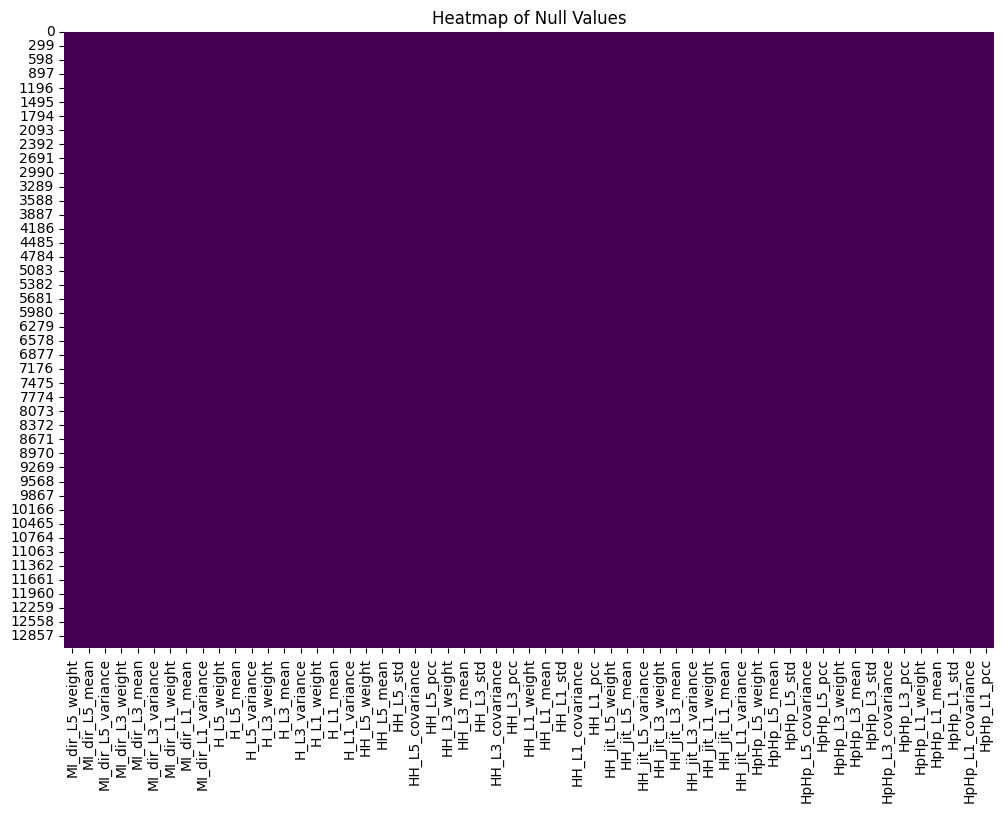

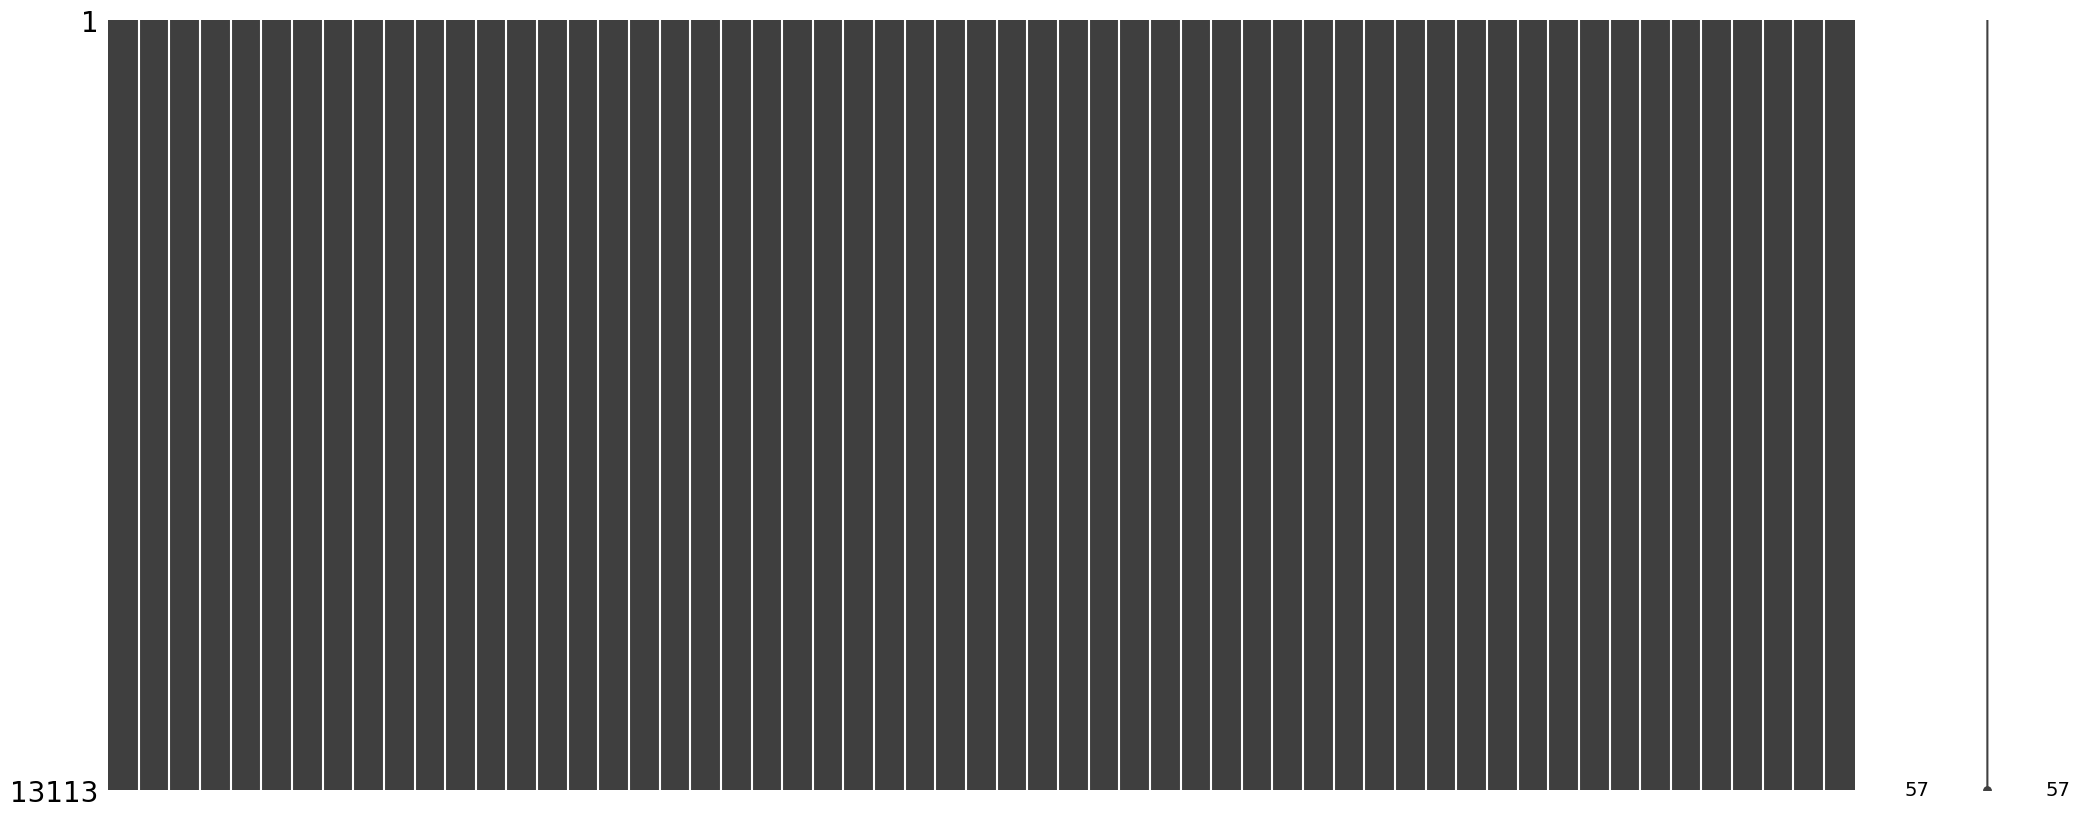

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      4.311646e+00
MI_dir_L5_mean        1.108155e+03
MI_dir_L5_variance    2.721017e+05
MI_dir_L3_weight      4.660031e+00
MI_dir_L3_mean        1.090333e+03
MI_dir_L3_variance    2.693159e+05
MI_dir_L1_weight      7.895283e+00
MI_dir_L1_mean        9.404513e+02
MI_dir_L1_variance    2.416279e+05
H_L5_weight           4.311646e+00
H_L5_mean             1.108155e+03
H_L5_variance         2.721017e+05
H_L3_weight           4.660031e+00
H_L3_mean             1.090333e+03
H_L3_variance         2.693159e+05
H_L1_weight           7.895283e+00
H_L1_mean             9.404513e+02
H_L1_variance         2.416279e+05
HH_L5_weight          4.311646e+00
HH_L5_mean            1.108155e+03
HH_L5_std             5.216337e+02
HH_L5_covariance      1.339445e+04
HH_L5_pcc             4.114972e-01
HH_L3_weight          4.660029e+00
HH_L3_mean            1.090333e+03
HH_L3_std             5.189566e+02
HH_L3_covariance      1.869065e+04
HH_L3_pcc             

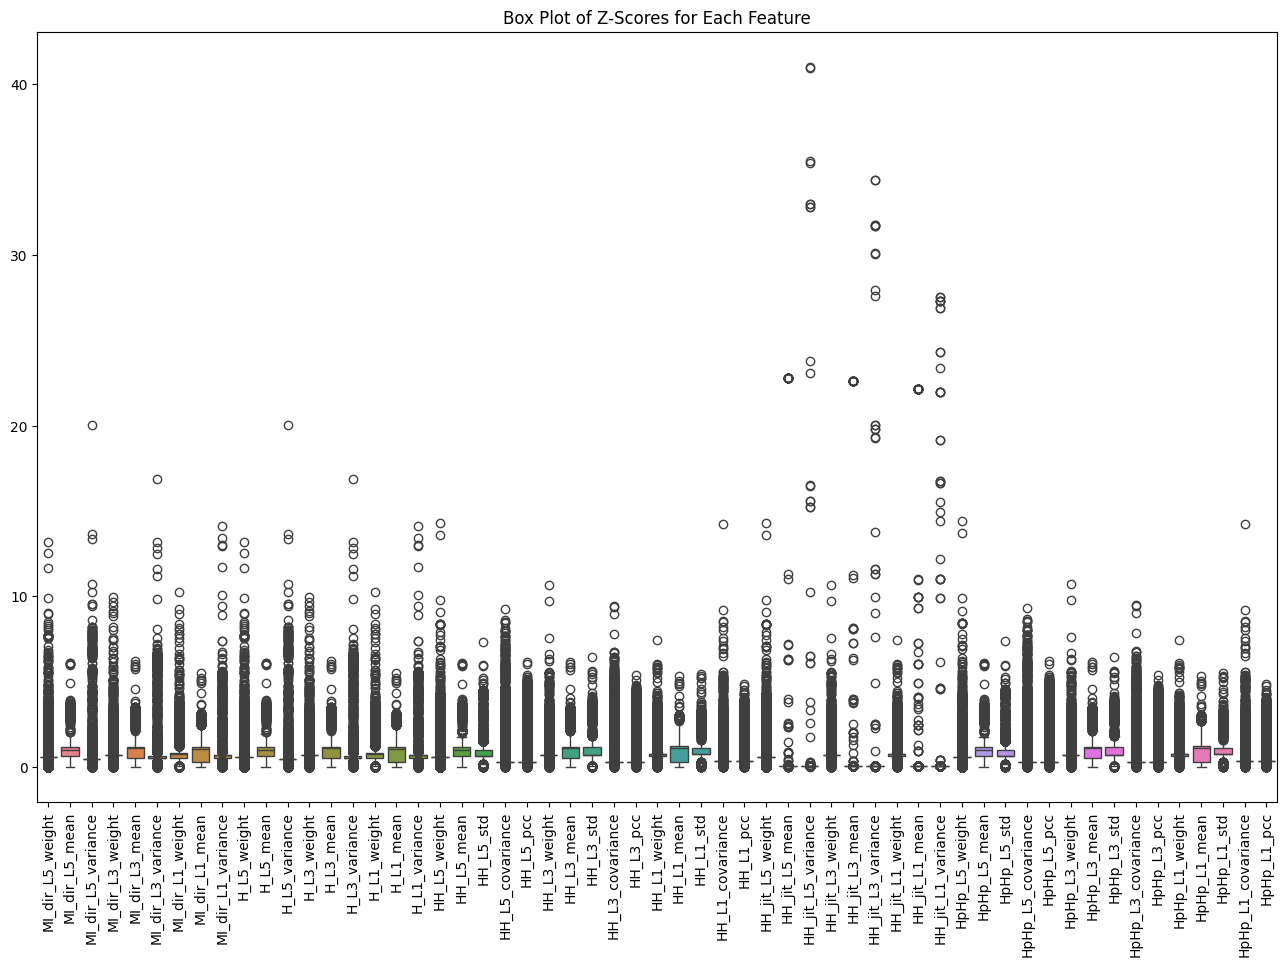

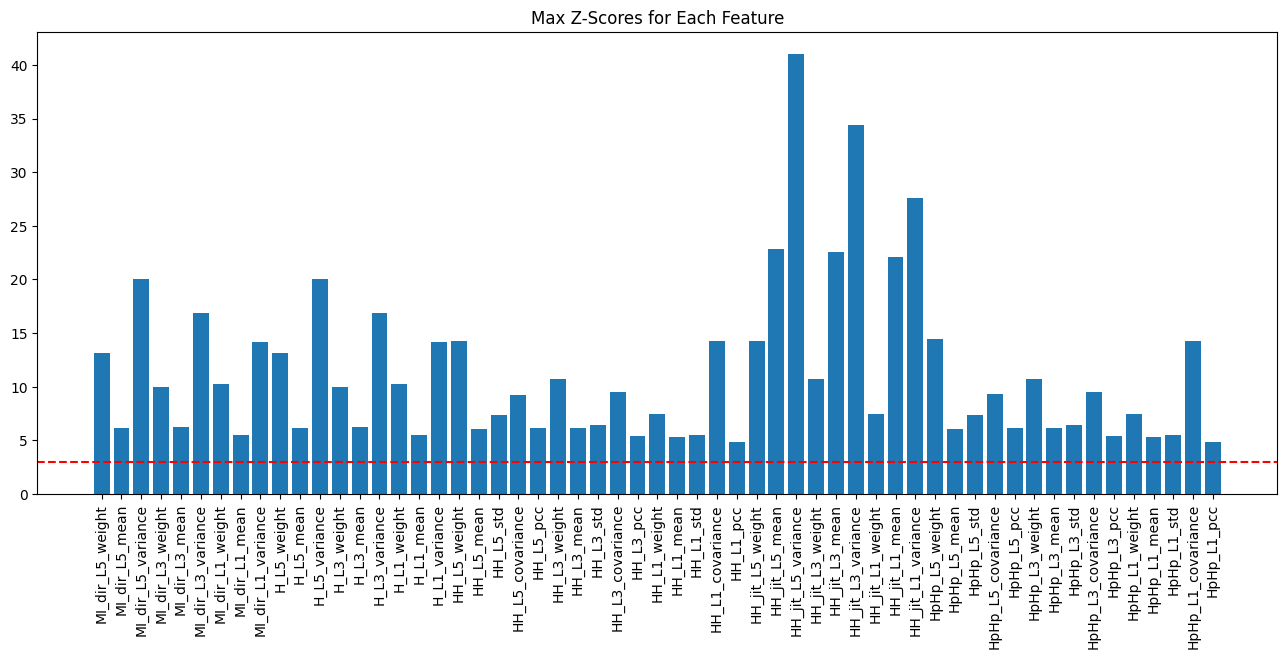

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 1455


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000        0.000000e+00          1.000000   
2          1.724055       91.439104        2.494418e+02          1.823878   
4          2.516815       90.867308        1.508276e+02          2.688981   
6          2.696687      342.000000        1.460000e-11          2.805070   
7          2.254705      342.000000        0.000000e+00          2.772435   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000        0.000000e+00          1.000000       60.000000   
2       92.454965        2.536129e+02          1.937463       93.483558   
4       91.541993        1.607051e+02          2.888469       92.277536   
6      342.000000        0.000000e+00          2.930282      342.000000   
7      342.000000        1.460000e-11          3.514500      342.000000   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0        0.000000e+00     1.000000  ...        1.000000     60.000000   
2        2.557333e+02     1.724055  ...        1.000000     78.000000   
4        1.699441e+02     2.516815  ...        1.762943     98.655331   
6        0.000000e+00     2.696687  ...        2.805070    342.000000   
7        1.460000e-11     2.254705  ...        2.772435    342.000000   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
2     0.000000                 0.0          0.0        1.000000     78.000000   
4     9.909181                 0.0          0.0        1.913757     99.549351   
6     0.000000                 0.0          0.0        2.930282    342.000000   
7     0.000004                 0.0          0.0        3.514500    342.000000   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
2     0.000000                 0.0          0.0  
4     9.989841                 0.0          0.0  
6     0.000000                 0.0          0.0  
7     0.000004                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight      269
MI_dir_L5_mean        148
MI_dir_L5_variance    216
MI_dir_L3_weight      128
MI_dir_L3_mean        131
MI_dir_L3_variance    236
MI_dir_L1_weight      132
MI_dir_L1_mean         63
MI_dir_L1_variance    252
H_L5_weight           269
H_L5_mean             148
H_L5_variance         216
H_L3_weight           128
H_L3_mean             131
H_L3_variance         236
H_L1_weight           132
H_L1_mean              63
H_L1_variance         252
HH_L5_weight          243
HH_L5_mean            151
HH_L5_std             182
HH_L5_covariance      444
HH_L5_pcc             597
HH_L3_weight          115
HH_L3_mean            133
HH_L3_std             185
HH_L3_covariance      566
HH_L3_pcc             563
HH_L1_weight          142
HH_L1_mean             22
HH_L1_std             140
HH_L1_covariance      655
HH_L1_pcc             612
HH_jit_L5_weight      243
HH_jit_L5_mean         34
HH_jit_L5_variance     23
HH_jit_L3_weight      115
HH_jit

Number of outliers per feature:
MI_dir_L5_weight      269
MI_dir_L5_mean        148
MI_dir_L5_variance    216
MI_dir_L3_weight      128
MI_dir_L3_mean        131
MI_dir_L3_variance    236
MI_dir_L1_weight      132
MI_dir_L1_mean         63
MI_dir_L1_variance    252
H_L5_weight           269
H_L5_mean             148
H_L5_variance         216
H_L3_weight           128
H_L3_mean             131
H_L3_variance         236
H_L1_weight           132
H_L1_mean              63
H_L1_variance         252
HH_L5_weight          243
HH_L5_mean            151
HH_L5_std             182
HH_L5_covariance      444
HH_L5_pcc             597
HH_L3_weight          115
HH_L3_mean            133
HH_L3_std             185
HH_L3_covariance      566
HH_L3_pcc             563
HH_L1_weight          142
HH_L1_mean             22
HH_L1_std             140
HH_L1_covariance      655
HH_L1_pcc             612
HH_jit_L5_weight      243
HH_jit_L5_mean         34
HH_jit_L5_variance     23
HH_jit_L3_weight      115
HH_jit

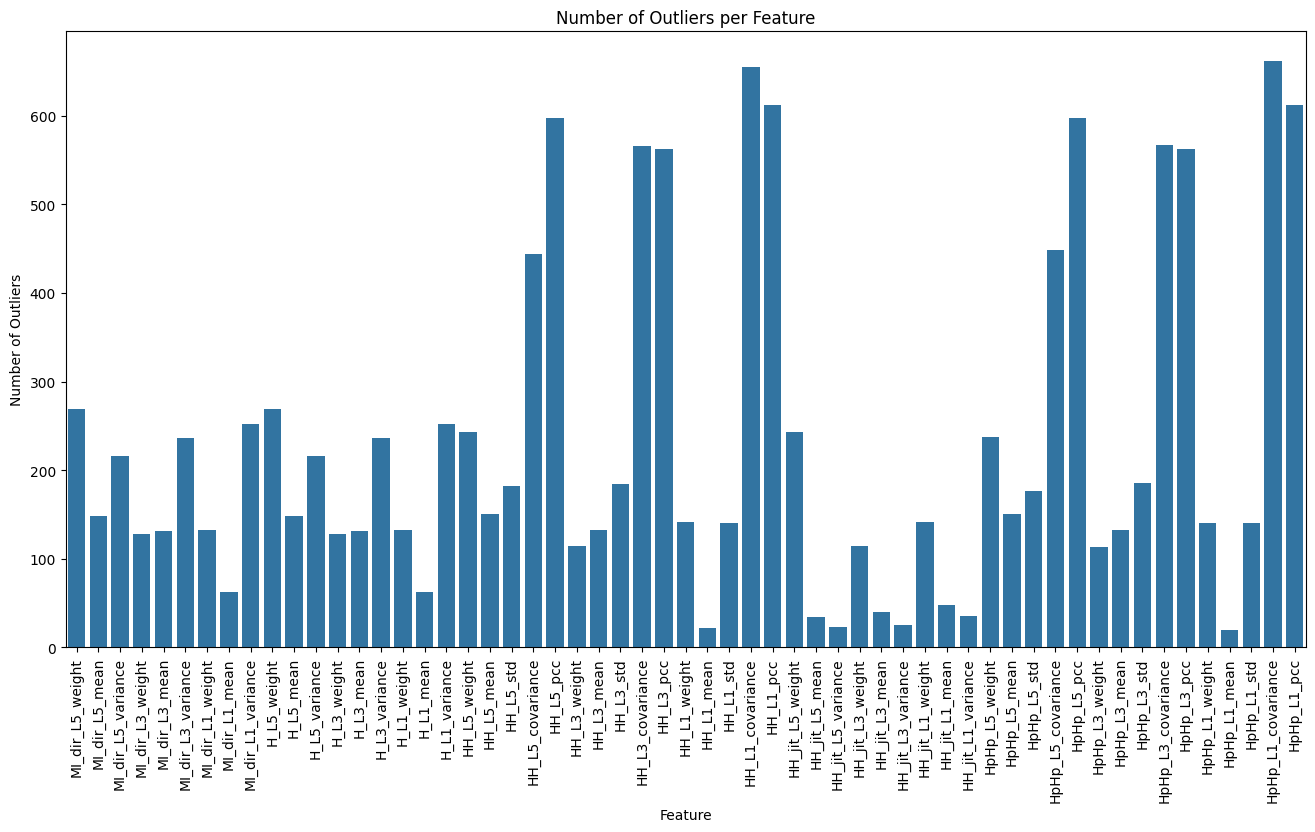

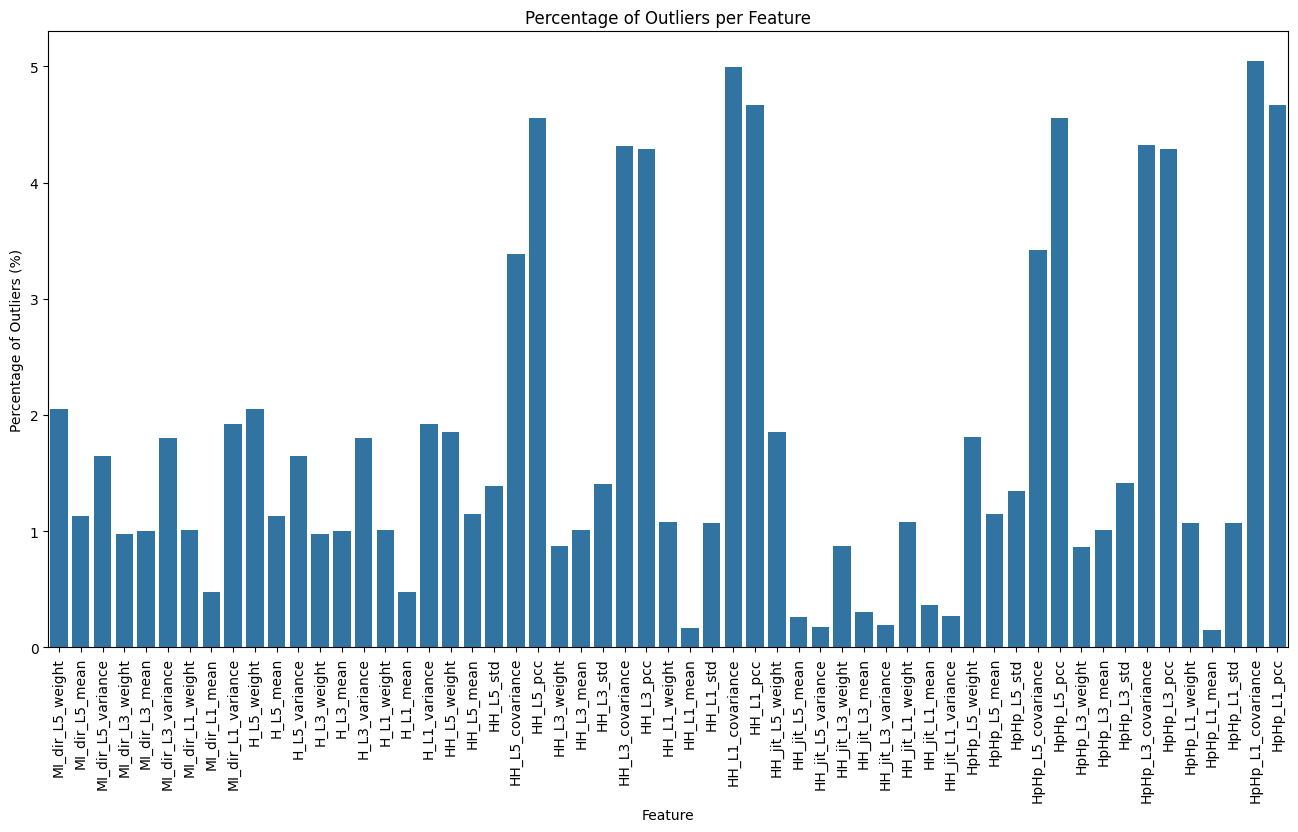

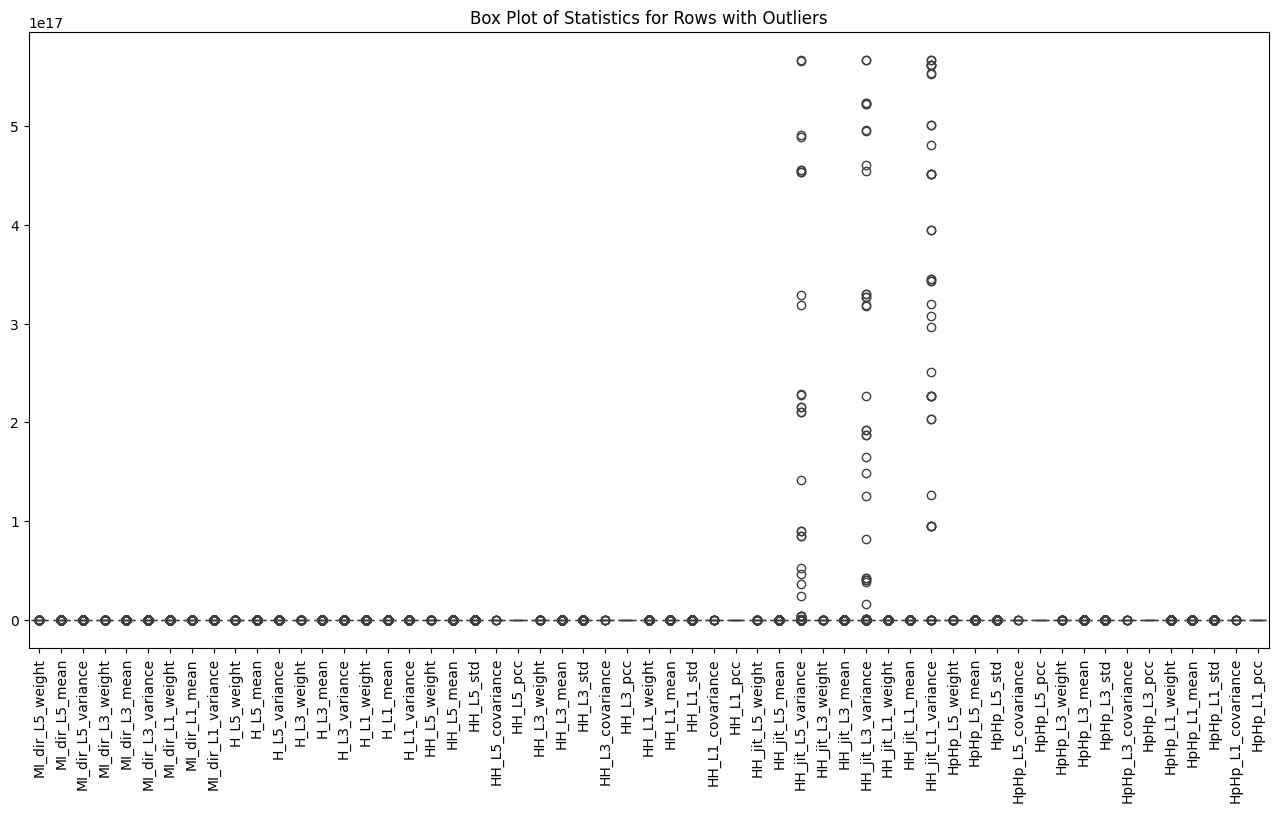

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (13113, 57)
Cleaned dataset shape: (11658, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
1           1.000000      110.000000        0.000000e+00          1.000000   
3           1.000000      342.000000        0.000000e+00          1.000000   
5           1.697058      342.000000        5.820000e-11          1.805307   
9           1.180654       90.132708        2.317587e+01          1.553586   
34          1.000001      511.999979        9.027665e-03          1.000288   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
1       110.000000        0.000000e+00          1.000000      110.000000   
3       342.000000        0.000000e+00          1.000000      342.000000   
5       342.000000        1.460000e-11          1.930366      342.000000   
9        90.549455        5.780905e+01          2.705559       91.435737   
34      511.981087        8.305921e+00  

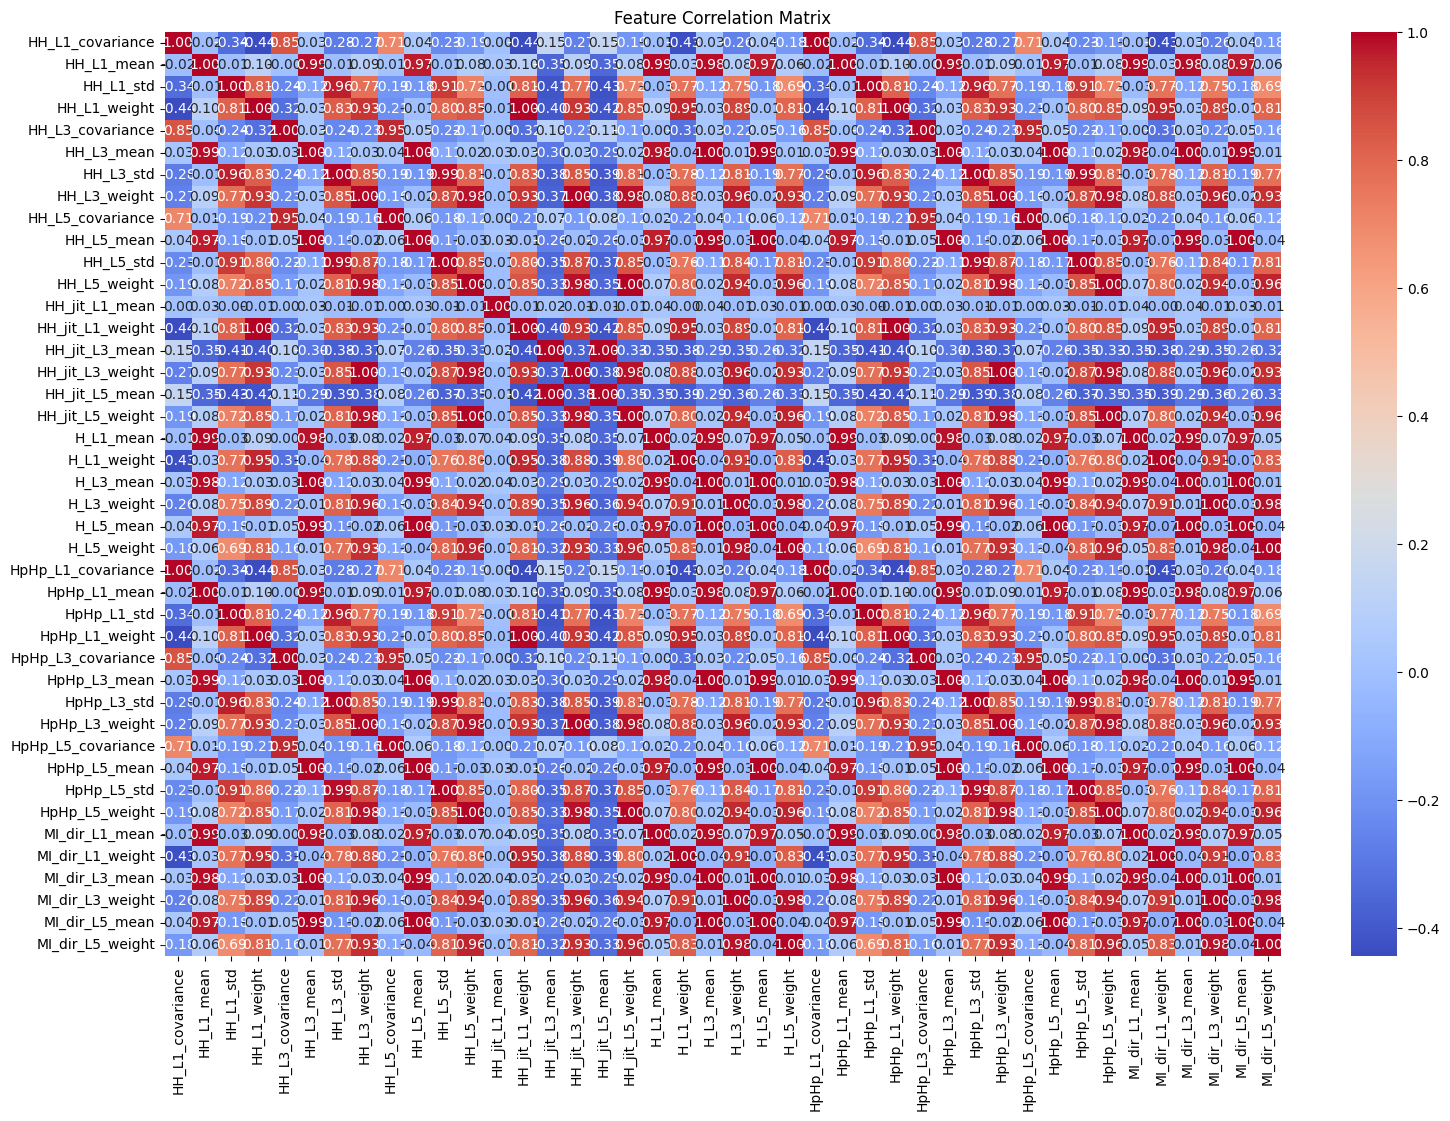

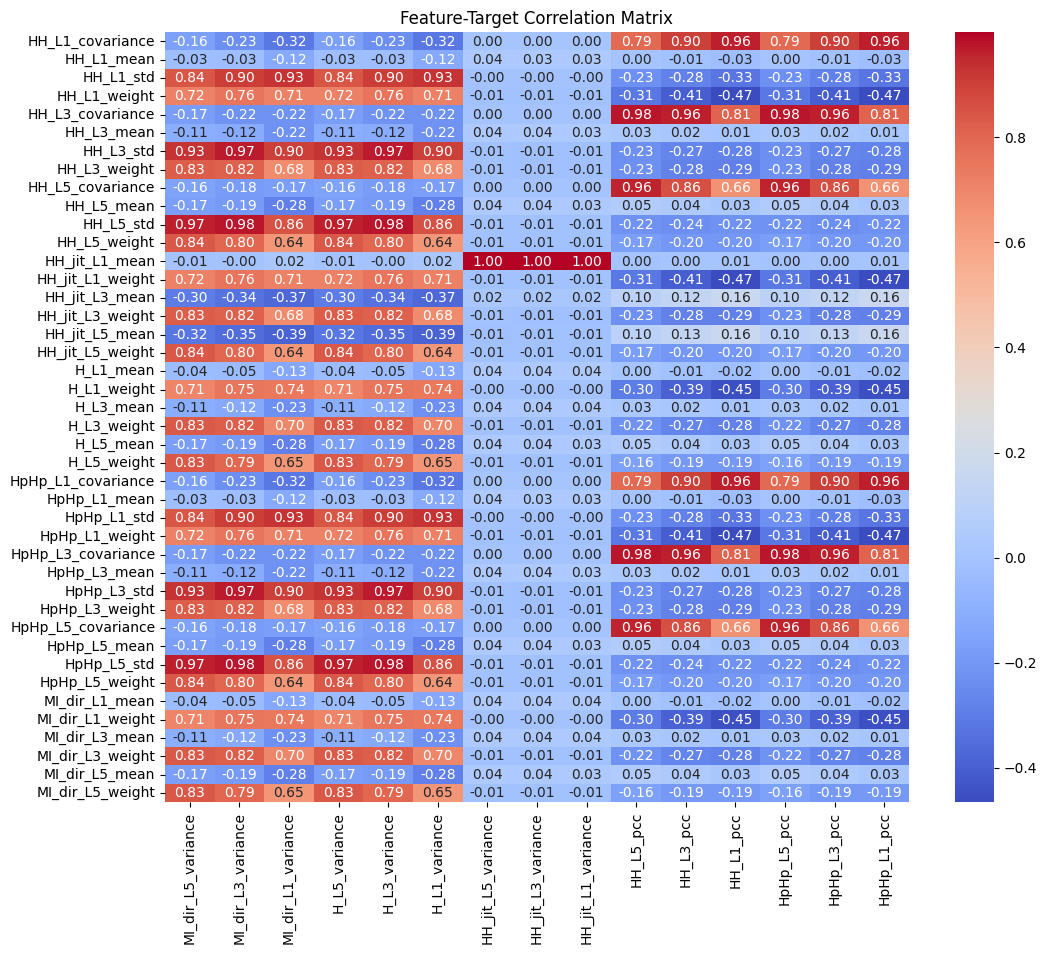

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      1.165800e+04  11658.000000  11658.000000  11658.000000   
mean      -4.045483e+02    221.874308     48.277589      1.320967   
std        1.747068e+03    131.218721     68.716925      0.475386   
min       -1.318760e+04     60.000000      0.000000      1.000000   
25%       -7.607500e-18     60.000000      0.000000      1.000000   
50%      -1.475000e-197    204.860540      0.000149      1.000000   
75%        0.000000e+00    379.999766    139.203651      1.725869   
max        9.976764e+03    571.301911    242.158870      3.205841   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      1.165800e+04  11658.000000  11658.000000  11658.000000   
mean      -1.552492e+02    211.706139     39.878297      1.155767   
std        9.393813e+02    136.720775     60.573485      0.243043   
min       -9.118174e+03     60.000000      0.000000      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance  HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000    1.018141   1.336500      1.444097   
HH_L1_mean                  1.018141    0.000000   1.006213      0.895493   
HH_L1_std                   1.336500    1.006213   0.000000      0.185629   
HH_L1_weight                1.444097    0.895493   0.185629      0.000000   
HH_L3_covariance            0.149041    1.001490   1.243685      1.323606   
HH_L3_mean                  0.973627    0.014059   1.117974      0.965960   
HH_L3_std                   1.283507    1.014668   0.037300      0.172289   
HH_L3_weight                1.267527    0.906408   0.227534      0.074725   
HH_L5_covariance            0.294527    0.988713   1.185081      1.214546   
HH_L5_mean                  0.956538    0.031635   1.181672      1.008884   
HH_L5_std                   1.230008    1.012450   0.086914      0.197263   
HH_L5_weight                1.186367    0.920353   0.278898

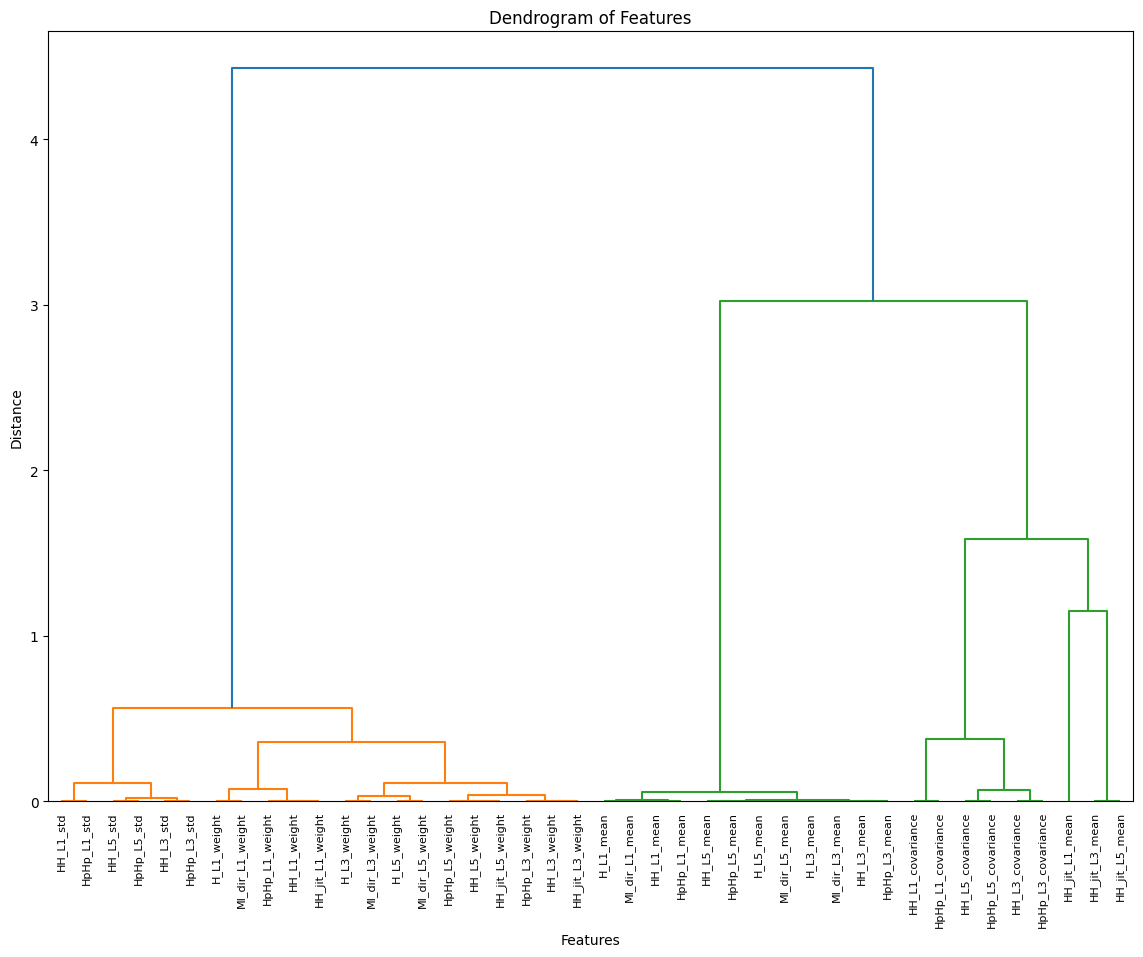

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_std, HH_L1_weight, HH_L3_std, HH_L3_wei...
1        2  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
2        3  [HH_L1_covariance, HH_L3_covariance, HH_L5_cov...
3        4                   [HH_jit_L3_mean, HH_jit_L5_mean]
4        5                                   [HH_jit_L1_mean]


In [ ]:
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        3
1           HH_L1_mean        2
2            HH_L1_std        1
3         HH_L1_weight        1
4     HH_L3_covariance        3
5           HH_L3_mean        2
6            HH_L3_std        1
7         HH_L3_weight        1
8     HH_L5_covariance        3
9           HH_L5_mean        2
10           HH_L5_std        1
11        HH_L5_weight        1
12      HH_jit_L1_mean        3
13    HH_jit_L1_weight        1
14      HH_jit_L3_mean        3
15    HH_jit_L3_weight        1
16      HH_jit_L5_mean        3
17    HH_jit_L5_weight        1
18           H_L1_mean        2
19         H_L1_weight        1
20           H_L3_mean        2
21         H_L3_weight        1
22           H_L5_mean        2
23         H_L5_weight        1
24  HpHp_L1_covariance        3
25        HpHp_L1_mean        2
26         HpHp_L1_std        1
27      HpHp_L1_weight        1
28  HpHp_L3_covariance        3
29        HpHp_L3_mean        2
30      

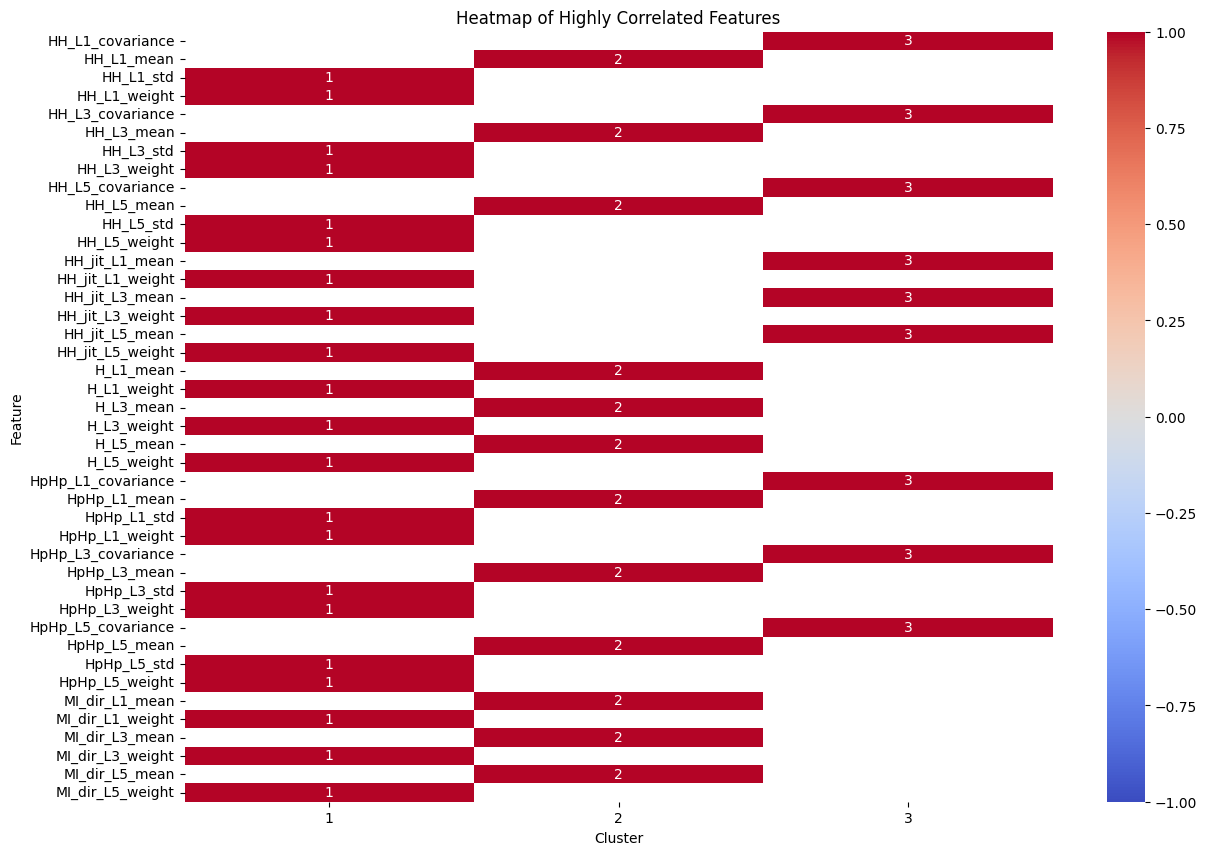

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.75196569 0.75625447 0.76197284 0.75982845 0.75536481]
Mean Cross-Validation Accuracy: 0.757077250151089
Validation Set Performance:
Accuracy: 0.8176100628930818
Precision: 0.5949230453348179
Recall: 0.658171443072339
F1-Score: 0.594279453952406
Test Set Performance:
Accuracy: 0.8164665523156089
Precision: 0.5623059110079132
Recall: 0.6335706030759233
F1-Score: 0.5694057748697383

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.91350965 0.90922087 0.92494639 0.90493209 0.91416309]
Mean Cross-Validation Accuracy: 0.9133544193123843
Validation Set Performance:
Accuracy: 0.710691823899371
Precision: 0.41864471641830736
Recall: 0.5300723562681294
F1-Score: 0.3785590907893066
Test Set Performance:
Accuracy: 0.7217838765008576
Precision: 0.41565875761411686
Recall: 0.5323623854970256
F1-Score: 0.38129569024348514

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.89278056 0.90564689 0.91708363 0.90135811 0.90057225]
Mean Cross-Validation Accuracy: 0.9034882876692016
Validation Set Performance:
Accuracy: 0.9222412807318467
Precision: 0.6455317703024125
Recall: 0.7704877518442504
F1-Score: 0.65475721369752
Test Set Performance:
Accuracy: 0.8994854202401372
Precision: 0.6240529062164156
Recall: 0.8432067301298473
F1-Score: 0.6521610022548678

--------------------------------------------------

Trai

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.91350965 0.90922087 0.92494639 0.90493209 0.91416309]
Mean Cross-Validation Accuracy: 0.9133544193123843
Validation Set Performance:
Accuracy: 0.710691823899371
Precision: 0.41864471641830736
Recall: 0.5300723562681294
F1-Score: 0.3785590907893066
Test Set Performance:
Accuracy: 0.7217838765008576
Precision: 0.41565875761411686
Recall: 0.5323623854970256
F1-Score: 0.38129569024348514

--------------------------------------------------

Training model for target: H_L1_variance
Cross-Validation Accuracy Scores: [0.89278056 0.90564689 0.91708363 0.90135811 0.90057225]
Mean Cross-Validation Accuracy: 0.9034882876692016
Validation Set Performance:
Accuracy: 0.9222412807318467
Precision: 0.6455317703024125
Recall: 0.7704877518442504
F1-Score: 0.65475721369752
Test Set Performance:
Accuracy: 0.8994854202401372
Precision: 0.6240529062164156
Recall: 0.8432067301298473
F1-Score: 0.6521610022548678

--------------------------------------------------

Training 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.71694067 0.66190136 0.70050036 0.99785561 0.64449213]
Mean Cross-Validation Accuracy: 0.7443380260374004
Validation Set Performance:
Accuracy: 0.7026872498570612
Precision: 0.5019157088122606
Recall: 0.8511734401831712
F1-Score: 0.41639244957571214
Test Set Performance:
Accuracy: 0.7073756432246998
Precision: 0.4997576345128454
Recall: 0.3538091969800961
F1-Score: 0.4143058067108701

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.71694067 0.66190136 0.70050036 0.99785561 0.64449213]
Mean Cross-Validation Accuracy: 0.7443380260374004
Validation Set Performance:
Accuracy: 0.7026872498570612
Precision: 0.5019157088122606
Recall: 0.8511734401831712
F1-Score: 0.41639244957571214
Test Set Performance:
Accuracy: 0.707032590051458
Precision: 0.3330101793504605
Recall: 0.23583934088568484
F1-Score: 0.27612540192926044

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.71694067 0.66190136 0.70050036 0.99785561 0.64449213]
Mean Cross-Validation Accuracy: 0.7443380260374004
Validation Set Performance:
Accuracy: 0.7026872498570612
Precision: 0.5019157088122606
Recall: 0.8511734401831712
F1-Score: 0.41639244957571214
Test Set Performance:
Accuracy: 0.7073756432246998
Precision: 0.4997576345128454
Recall: 0.3538091969800961
F1-Score: 0.4143058067108701

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.92137241 0.92709078 0.95210865 0.93352395 0.93562232]
Mean Cross-Validation Accuracy: 0.9339436200596994
Validation Set Performance:
Accuracy: 0.9456832475700401
Precision: 0.5109052227026285
Recall: 0.9446607822776046
F1-Score: 0.5915975551416012
Test Set Performance:
Accuracy: 0.939622641509434
Precision: 0.48117175395871487
Recall: 0.9386491801147351
F1-Score: 0.5489253451981568

--------------------------------------------------

Training mod

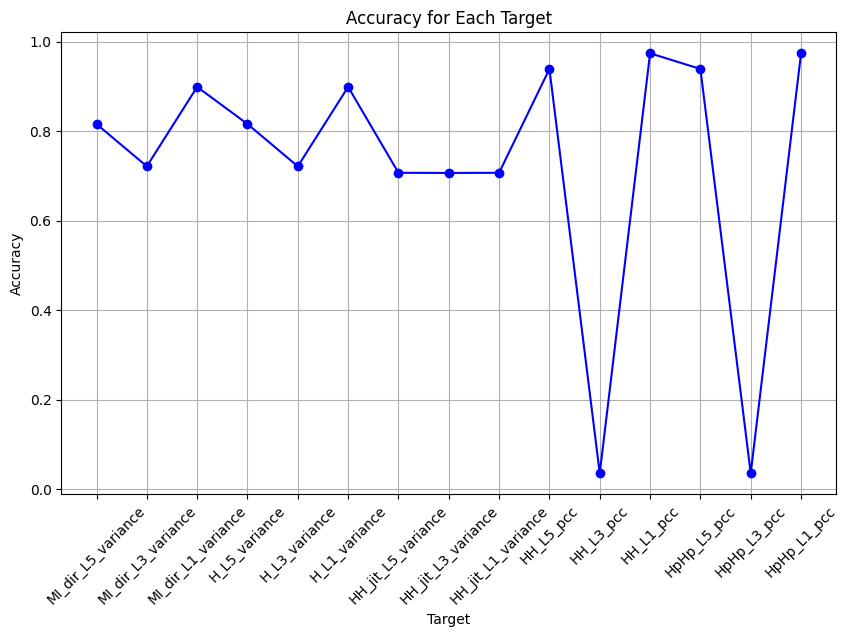

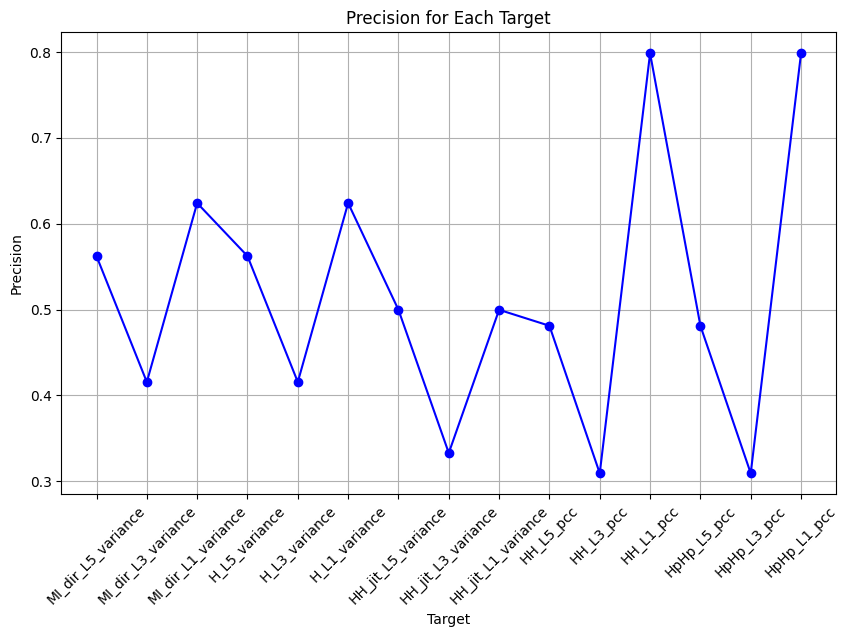

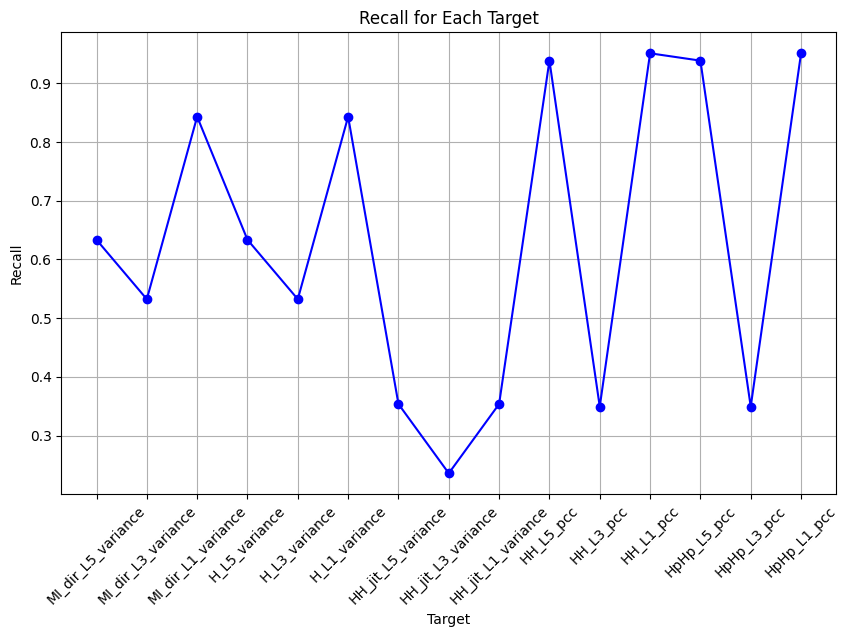

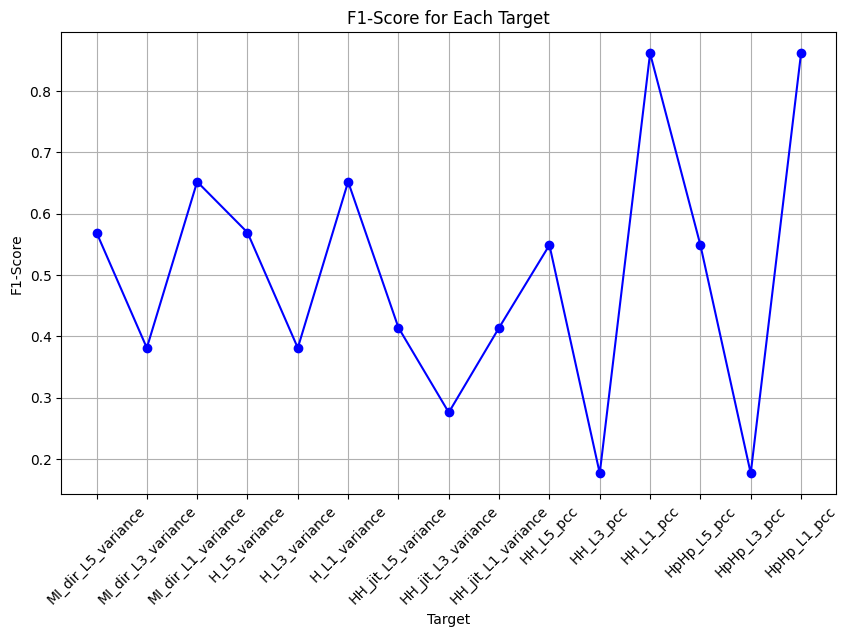

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.198399085191538
Precision: 0.3821632026196855
Recall: 0.242611365143791
F1-Score: 0.1876588465298143
Test Set Performance:
Accuracy: 0.18696397941680962
Precision: 0.2898050032263238
Recall: 0.25219298245614036
F1-Score: 0.17740896780912171

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.37964551172098343
Precision: 0.23758764858674652
Recall: 0.22123264666368114
F1-Score: 0.18648917456155836
Test Set Performance:
Accuracy: 0.38662092624356775
Precision: 0.24892346642630966
Recall: 0.25522538657056426
F1-Score: 0.1981398561610183

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.6935391652372784
Precision: 0.4801520480720556
Recall: 0.38353141457050577
F1-Score: 0.4209895617234075
Test Set Performance:
Accuracy: 0.6655231560

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 0.37964551172098343
Precision: 0.23758764858674652
Recall: 0.22123264666368114
F1-Score: 0.18648917456155836
Test Set Performance:
Accuracy: 0.38662092624356775
Precision: 0.24892346642630966
Recall: 0.25522538657056426
F1-Score: 0.1981398561610183

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0.6935391652372784
Precision: 0.4801520480720556
Recall: 0.38353141457050577
F1-Score: 0.4209895617234075
Test Set Performance:
Accuracy: 0.6655231560891939
Precision: 0.4555639882364102
Recall: 0.3796178909989423
F1-Score: 0.4040256236307969

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Validation Set Performance:
Accuracy: 0.6849628359062321
Precision: 0.3327777777777778
Recall: 0.22858233161610378
F1-Score: 0.27101006673453226
Test Set Performance:
Accuracy: 0.6898799313893653
Precision: 0.3333333333333333
Recall: 0.2300388927018989
F1-Score: 0.27

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-

Accuracy: 0.6898799313893653
Precision: 0.3333333333333333
Recall: 0.2300388927018989
F1-Score: 0.27221658206429783

--------------------------------------------------

Training model for target: HH_L5_pcc
Validation Set Performance:
Accuracy: 0.9879931389365352
Precision: 0.8956804849139548
Recall: 0.689462493200811
F1-Score: 0.6666105310919823
Test Set Performance:
Accuracy: 0.9890222984562608
Precision: 0.565734188412207
Recall: 0.6411979479845503
F1-Score: 0.5981345458785122

--------------------------------------------------

Training model for target: HH_L3_pcc
Validation Set Performance:
Accuracy: 0.9748427672955975
Precision: 0.7357759742421216
Recall: 0.7262620310351601
F1-Score: 0.6668342550695491
Test Set Performance:
Accuracy: 0.03876500857632933
Precision: 0.4826213727032906
Recall: 0.482136597781029
F1-Score: 0.2133856293077502

--------------------------------------------------

Training model for target: HH_L1_pcc
Validation Set Performance:
Accuracy: 0.9702687249857062

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


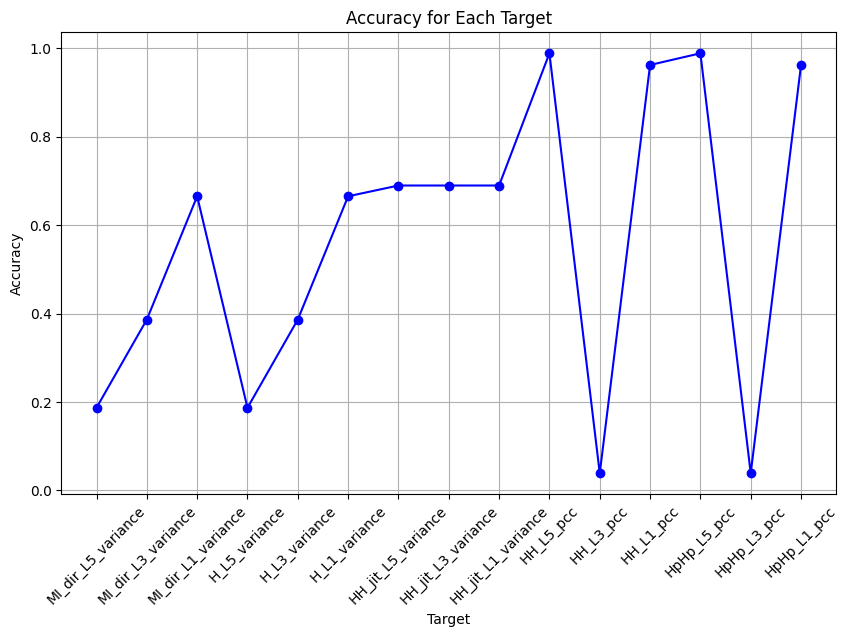

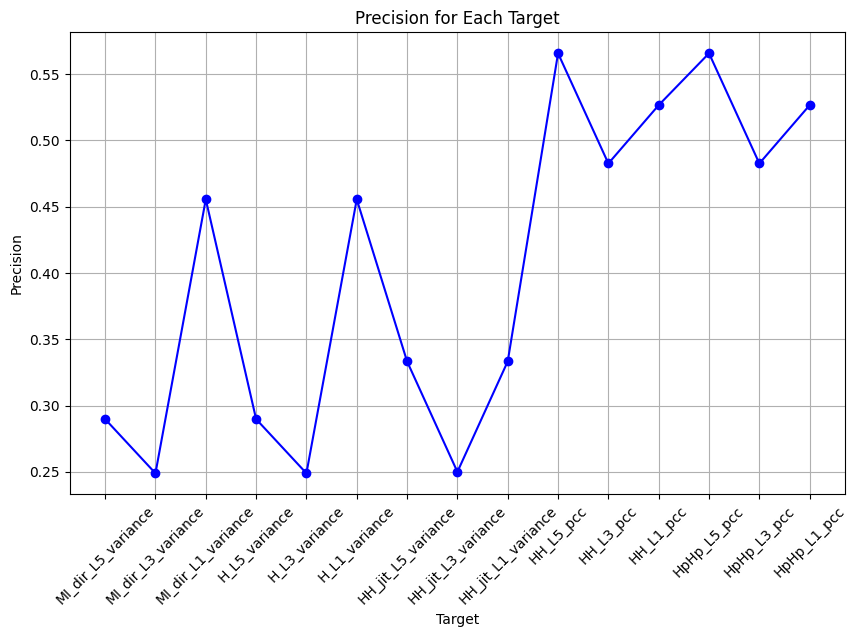

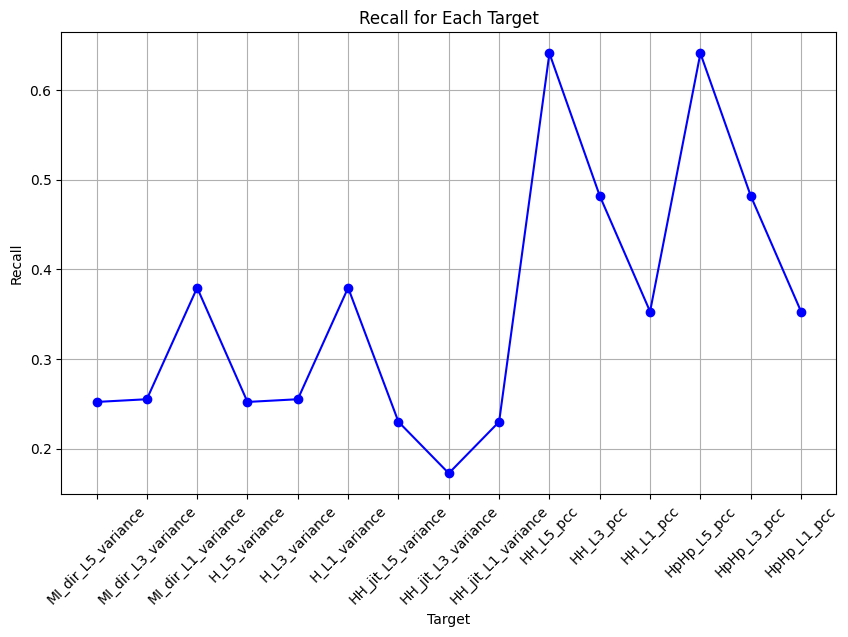

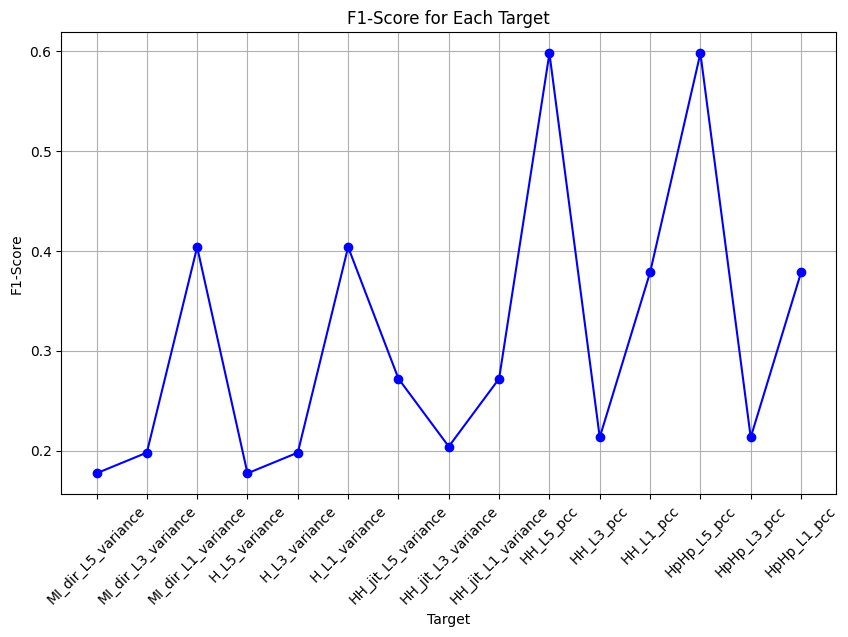

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.95568263 0.96283059 0.96783417 0.96640457 0.95851216]
Mean Cross-Validation Accuracy: 0.9622528251837353
Validation Set Performance:
Accuracy: 0.8393367638650657
Precision: 0.37502347510650286
Recall: 0.4483575213434799
F1-Score: 0.4049956455148803
Test Set Performance:
Accuracy: 0.8408233276157805
Precision: 0.3666511777695988
Recall: 0.45477252453166817
F1-Score: 0.4002919135587313

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97212294 0.97498213 0.97641172 0.96997856 0.97067239]
Mean Cross-Validation Accuracy: 0.9728335485902969
Validation Set Performance:
Accuracy: 0.7375643224699828
Precision: 0.33746357262392523
Recall: 0.4585087326466637
F1-Score: 0.35976605198529304
Test Set Performance:
Accuracy: 0.7554030874785592
Precision: 0.34773815715913353
Recall: 0.48572624968564054
F1-Score: 0.37325058678442136

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.9621158  0.96354539 0.96568978 0.96283059 0.96137339]
Mean Cross-Validation Accuracy: 0.9631109897627674
Validation Set Performance:
Accuracy: 0.9451114922813036
Precision: 0.4752117533311999
Recall: 0.46066496428173676
F1-Score: 0.46699231419820497
Test Set Performance:
Accuracy: 0.9608919382504288
Precision: 0.4767570989249761
Recall: 0.4752441082776818
F1-Score: 0.4759801506628918

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.95568263 0.96283059 0.96783417 0.96640457 0.95851216]
Mean Cross-Validation Accuracy: 0.9622528251837353
Validation Set Performance:
Accuracy: 0.8393367638650657
Precision: 0.37502347510650286
Recall: 0.4483575213434799
F1-Score: 0.4049956455148803
Test Set Performance:
Accuracy: 0.8408233276157805
Precision: 0.3666511777695988
Recall: 0.45477252453166817
F1-Score: 0.4002919135587313

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97212294 0.97498213 0.97641172 0.96997856 0.97067239]
Mean Cross-Validation Accuracy: 0.9728335485902969
Validation Set Performance:
Accuracy: 0.7375643224699828
Precision: 0.33746357262392523
Recall: 0.4585087326466637
F1-Score: 0.35976605198529304
Test Set Performance:
Accuracy: 0.7554030874785592
Precision: 0.34773815715913353
Recall: 0.48572624968564054
F1-Score: 0.37325058678442136

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.9621158  0.96354539 0.96568978 0.96283059 0.96137339]
Mean Cross-Validation Accuracy: 0.9631109897627674
Validation Set Performance:
Accuracy: 0.9451114922813036
Precision: 0.4752117533311999
Recall: 0.46066496428173676
F1-Score: 0.46699231419820497
Test Set Performance:
Accuracy: 0.9608919382504288
Precision: 0.4767570989249761
Recall: 0.4752441082776818
F1-Score: 0.4759801506628918

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [1.        0.9992852 0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9995711222301644
Validation Set Performance:
Accuracy: 0.9988564894225271
Precision: 0.49942824471126357
Recall: 0.5
F1-Score: 0.49971395881006864
Test Set Performance:
Accuracy: 0.9996569468267581
Precision: 0.49982847341337905
Recall: 0.5
F1-Score: 0.49991422199348085

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9992852 0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9995711222301644
Validation Set Performance:
Accuracy: 0.9988564894225271
Precision: 0.49942824471126357
Recall: 0.5
F1-Score: 0.49971395881006864
Test Set Performance:
Accuracy: 0.9993138936535163
Precision: 0.3331046312178388
Recall: 0.3333333333333333
F1-Score: 0.3332189430336307

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9992852 0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9995711222301644
Validation Set Performance:
Accuracy: 0.9988564894225271
Precision: 0.49942824471126357
Recall: 0.5
F1-Score: 0.49971395881006864
Test Set Performance:
Accuracy: 0.9996569468267581
Precision: 0.49982847341337905
Recall: 0.5
F1-Score: 0.49991422199348085

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99070765 0.99070765 0.98856326 0.98713367 0.990701  ]
Mean Cross-Validation Accuracy: 0.9895626448894111
Validation Set Performance:
Accuracy: 0.9857061177815895
Precision: 0.43300368431258485
Recall: 0.42740320427236317
F1-Score: 0.4301422855780186
Test Set Performance:
Accuracy: 0.9903945111492282
Precision: 0.45622388747639653
Recall: 0.4755212650122698
F1-Score: 0.46544374563242485

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98856326 0.99070765 0.98498928 0.98713367 0.98640916]
Mean Cross-Validation Accuracy: 0.9875606017378038
Validation Set Performance:
Accuracy: 0.9857061177815895
Precision: 0.43984825335092714
Recall: 0.48037503156831385
F1-Score: 0.4581292034893123
Test Set Performance:
Accuracy: 0.05214408233276158
Precision: 0.17237435173368812
Recall: 0.43783166273584906
F1-Score: 0.21171153751956093

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99571122 0.99213724 0.99285204 0.99356683 0.990701  ]
Mean Cross-Validation Accuracy: 0.9929936670480958
Validation Set Performance:
Accuracy: 0.9897084048027445
Precision: 0.4909760394644116
Recall: 0.4929099175902245
F1-Score: 0.49193385763258723
Test Set Performance:
Accuracy: 0.9862778730703259
Precision: 0.46763171501555034
Recall: 0.49428581739444244
F1-Score: 0.4801176240166263

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99070765 0.99070765 0.98856326 0.98713367 0.990701  ]
Mean Cross-Validation Accuracy: 0.9895626448894111
Validation Set Performance:
Accuracy: 0.9857061177815895
Precision: 0.43300368431258485
Recall: 0.42740320427236317
F1-Score: 0.4301422855780186
Test Set Performance:
Accuracy: 0.9903945111492282
Precision: 0.45622388747639653
Recall: 0.4755212650122698
F1-Score: 0.46544374563242485

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98856326 0.99070765 0.98498928 0.98713367 0.98640916]
Mean Cross-Validation Accuracy: 0.9875606017378038
Validation Set Performance:
Accuracy: 0.9857061177815895
Precision: 0.43984825335092714
Recall: 0.48037503156831385
F1-Score: 0.4581292034893123
Test Set Performance:
Accuracy: 0.05214408233276158
Precision: 0.17237435173368812
Recall: 0.43783166273584906
F1-Score: 0.21171153751956093

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99571122 0.99213724 0.99285204 0.99356683 0.990701  ]
Mean Cross-Validation Accuracy: 0.9929936670480958
Validation Set Performance:
Accuracy: 0.9897084048027445
Precision: 0.4909760394644116
Recall: 0.4929099175902245
F1-Score: 0.49193385763258723
Test Set Performance:
Accuracy: 0.9862778730703259
Precision: 0.46763171501555034
Recall: 0.49428581739444244
F1-Score: 0.4801176240166263

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.81136649514008
Average Precision: 0.39383429028021893
Average Recall: 0.4653397725738958
Average F1-Score: 0.4097759002246602


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

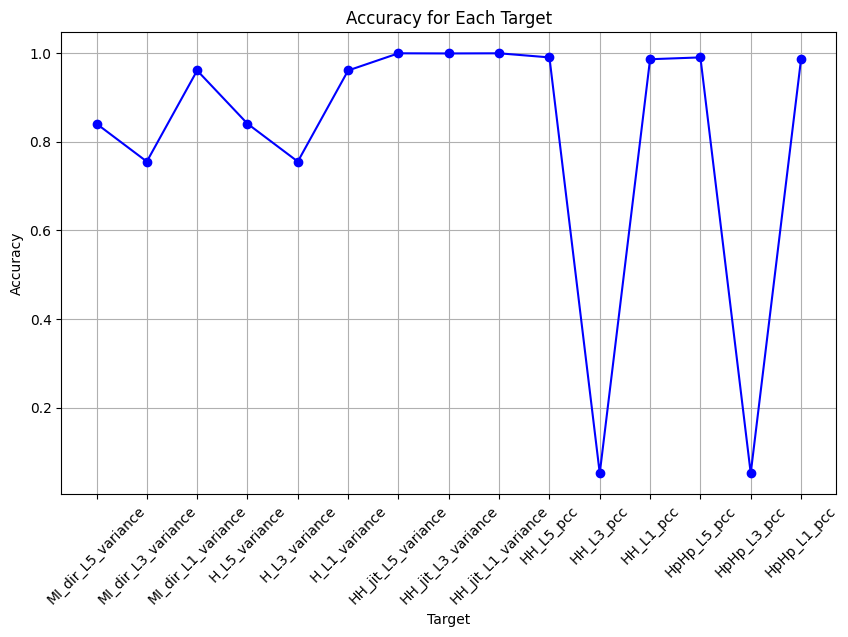

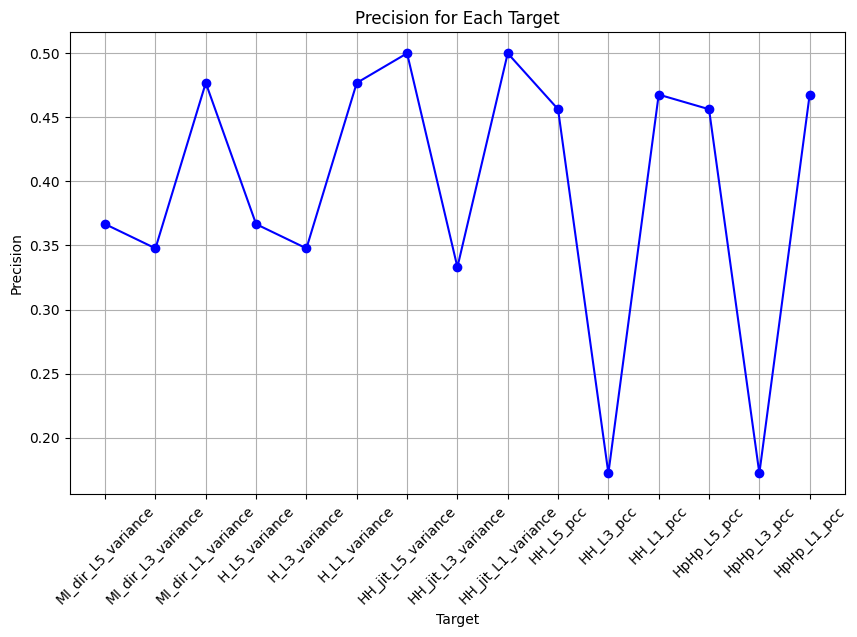

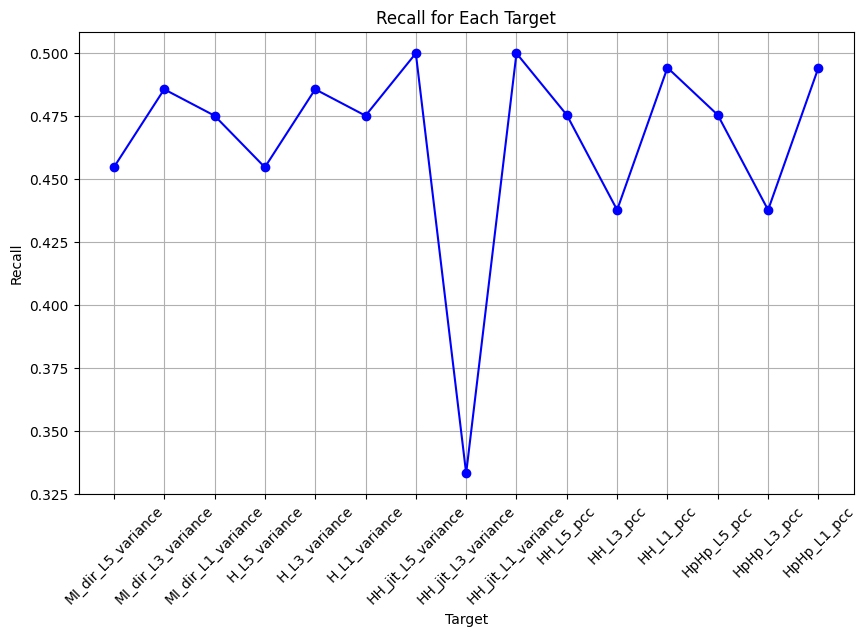

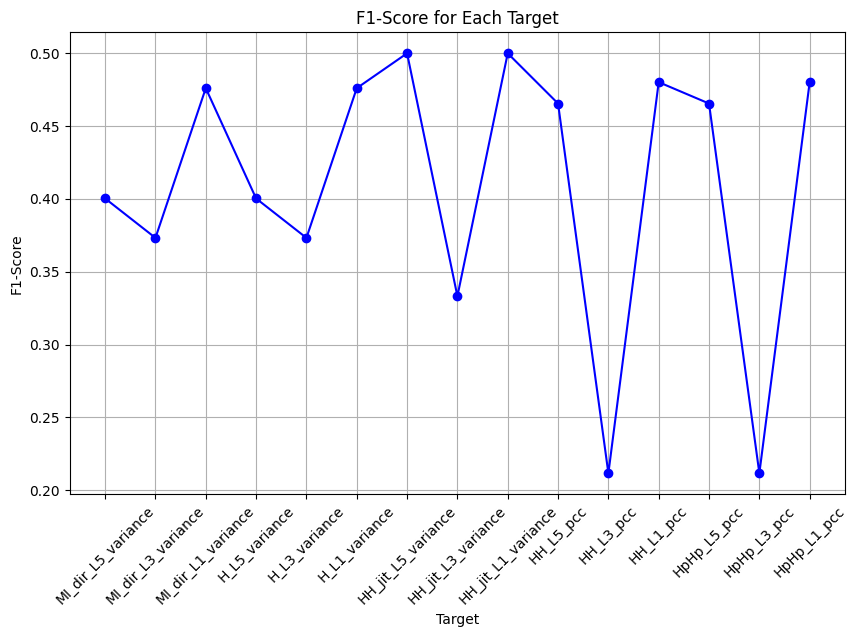

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.84774839 0.8663331  0.87491065 0.86990708 0.87124464]
Mean Cross-Validation Accuracy: 0.8660287697834443
Validation Set Performance:
Accuracy: 0.8004574042309891
Precision: 0.44977296699338837
Recall: 0.6133909588284336
F1-Score: 0.49096501987532387
Test Set Performance:
Accuracy: 0.7934819897084048
Precision: 0.4378087665599935
Recall: 0.6185152145901477
F1-Score: 0.476723756417065

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.91636883 0.92566119 0.93423874 0.9235168  0.92775393]
Mean Cross-Validation Accuracy: 0.9255078990613569
Validation Set Performance:
Accuracy: 0.725557461406518
Precision: 0.49096958979666566
Recall: 0.598742025493972
F1-Score: 0.39368580678196624
Test Set Performance:
Accuracy: 0.7355060034305317
Precision: 0.5389198988597873
Recall: 0.6057906492806194
F1-Score: 0.4007961570612038

---------

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.7934819897084048
Precision: 0.4378087665599935
Recall: 0.6185152145901477
F1-Score: 0.476723756417065

--------------------------------------------------

Training model for target: H_L3_variance
Cross-Validation Accuracy Scores: [0.91636883 0.92566119 0.93423874 0.9235168  0.92775393]
Mean Cross-Validation Accuracy: 0.9255078990613569
Validation Set Performance:
Accuracy: 0.725557461406518
Precision: 0.49096958979666566
Recall: 0.598742025493972
F1-Score: 0.39368580678196624
Test Set Performance:
Accuracy: 0.7355060034305317
Precision: 0.5389198988597873
Recall: 0.6057906492806194
F1-Score: 0.4007961570612038

--------------------------------------------------

Training model for target: H_L1_variance
Cross-Validation Accuracy Scores: [0.91493924 0.92709078 0.93423874 0.91922802 0.92703863]
Mean Cross-Validation Accuracy: 0.9245070820052336
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.9491137793024585
Precision: 0.7360351560015026
Recall: 0.916944696354987
F1-Score: 0.7831726839342453
Test Set Performance:
Accuracy: 0.9183533447684391
Precision: 0.6757485787869797
Recall: 0.8883904804400579
F1-Score: 0.7269141640433396

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [0.34310222 0.33452466 0.32237312 0.9992852  0.33261803]
Mean Cross-Validation Accuracy: 0.46638064589360273
Validation Set Performance:
Accuracy: 0.3321898227558605
Precision: 0.5008547008547009
Recall: 0.6657126502575844
F1-Score: 0.2506316781068145
Test Set Performance:
Accuracy: 0.3344768439108062
Precision: 0.5002575991756827
Recall: 0.667124227865477
F1-Score: 0.2510293363508835

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [0.34310222 0.33452466 0.32237312 0.9992852  0.33261803]
Mean Cross-Validation Accuracy: 0.4663

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to s

Validation Set Performance:
Accuracy: 0.3321898227558605
Precision: 0.5008547008547009
Recall: 0.6657126502575844
F1-Score: 0.2506316781068145
Test Set Performance:
Accuracy: 0.3344768439108062
Precision: 0.3335050661171218
Recall: 0.44478773315024606
F1-Score: 0.1673958570961626

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.34310222 0.33452466 0.32237312 0.9992852  0.33261803]
Mean Cross-Validation Accuracy: 0.46638064589360273
Validation Set Performance:
Accuracy: 0.3321898227558605
Precision: 0.5008547008547009
Recall: 0.6657126502575844
F1-Score: 0.2506316781068145
Test Set Performance:
Accuracy: 0.3344768439108062
Precision: 0.5002575991756827
Recall: 0.667124227865477
F1-Score: 0.2510293363508835

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.95782702 0.9621158  0.97140815 0.96926376 0.96924177]
Mean Cross-Validation Accuracy: 0.965971299753247
Validation Set Performance:
Accuracy: 0.9651229273870783
Precision: 0.5224873004821949
Recall: 0.6816743312070415
F1-Score: 0.5748520710059172
Test Set Performance:
Accuracy: 0.9660377358490566
Precision: 0.5245054919129517
Recall: 0.6410300164139567
F1-Score: 0.5673156569421666

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.95925661 0.96283059 0.97069335 0.96711937 0.96852647]
Mean Cross-Validation Accuracy: 0.965685278980183
Validation Set Performance:
Accuracy: 0.9656946826758147
Precision: 0.6505606845699957
Recall: 0.7231192300137498
F1-Score: 0.6315565031982943
Test Set Performance:
Accuracy: 0.028473413379073758
Precision: 0.447593669250646
Recall: 0.4015293525969276
F1-Score: 0.17365913210507808

--------------------------------------------------

Training mode

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.98427448 0.98213009 0.9807005  0.9807005  0.98497854]
Mean Cross-Validation Accuracy: 0.9825568232367081
Validation Set Performance:
Accuracy: 0.9828473413379074
Precision: 0.9262501917472005
Recall: 0.7791938997821352
F1-Score: 0.8018208504503171
Test Set Performance:
Accuracy: 0.9753001715265867
Precision: 0.8926122714873173
Recall: 0.7597397608058399
F1-Score: 0.7578221559860904

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.95782702 0.9621158  0.97140815 0.96926376 0.96924177]
Mean Cross-Validation Accuracy: 0.965971299753247
Validation Set Performance:
Accuracy: 0.9651229273870783
Precision: 0.5224873004821949
Recall: 0.6816743312070415
F1-Score: 0.5748520710059172
Test Set Performance:
Accuracy: 0.9660377358490566
Precision: 0.5245054919129517
Recall: 0.6410300164139567
F1-Score: 0.5673156569421666

--------------------------------------------------

Training mod

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.98427448 0.98213009 0.9807005  0.9807005  0.98497854]
Mean Cross-Validation Accuracy: 0.9825568232367081
Validation Set Performance:
Accuracy: 0.9828473413379074
Precision: 0.9262501917472005
Recall: 0.7791938997821352
F1-Score: 0.8018208504503171
Test Set Performance:
Accuracy: 0.9753001715265867
Precision: 0.8926122714873173
Recall: 0.7597397608058399
F1-Score: 0.7578221559860904

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.6558490566037737
Average Precision: 0.5578931745455893
Average Recall: 0.6406018091424198
Average F1-Score: 0.45839443832718774


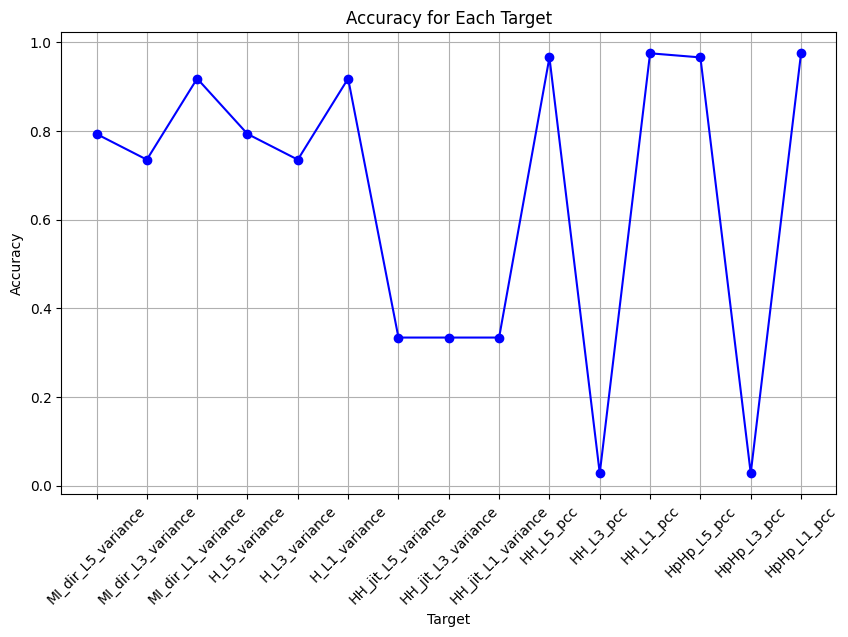

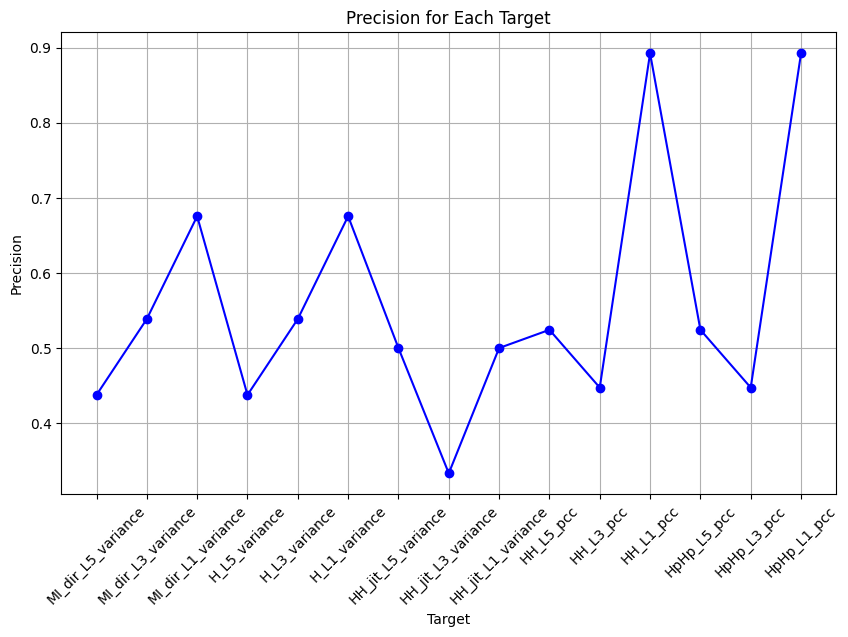

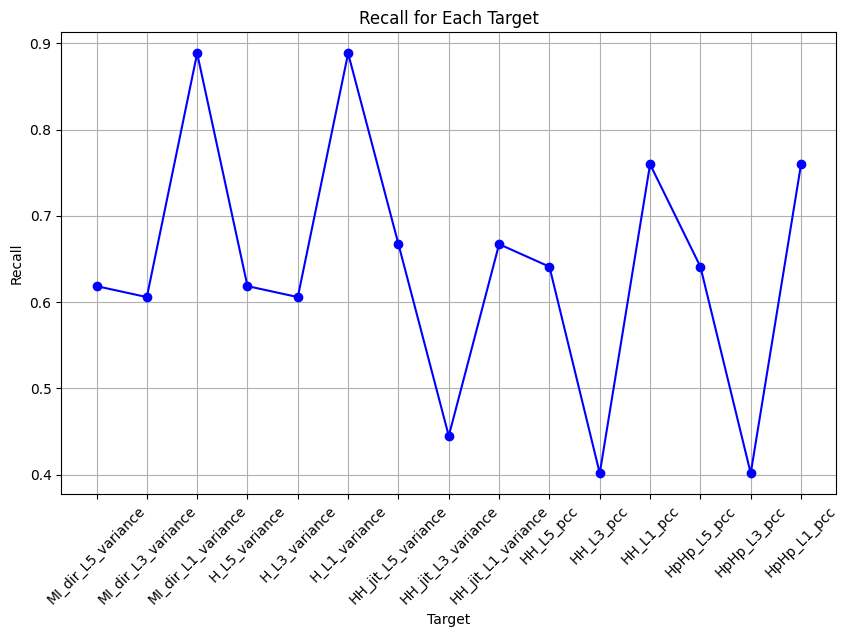

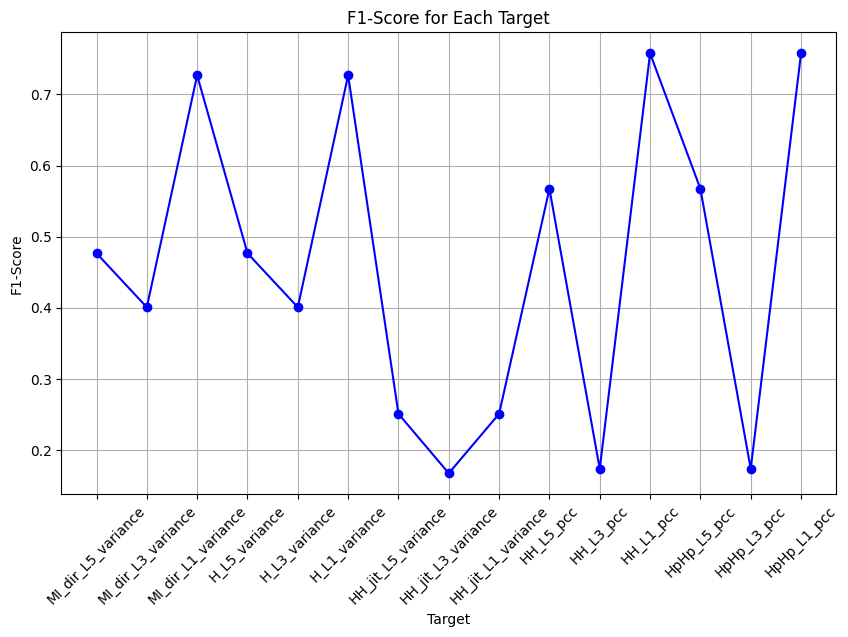

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97140815 0.98427448 0.97784132 0.97498213 0.97639485]
Mean Cross-Validation Accuracy: 0.9769801851107627
Validation Set Performance:
Accuracy: 0.9005145797598628
Precision: 0.8211313347244172
Recall: 0.745203177017876
F1-Score: 0.742852227874708
Test Set Performance:
Accuracy: 0.9042881646655232
Precision: 0.822311540370555
Recall: 0.7604987262845214
F1-Score: 0.7402824120516543

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.98427448 0.98856326 0.98498928 0.98498928 0.98354793]
Mean Cross-Validation Accuracy: 0.9852728445926531


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Validation Set Performance:
Accuracy: 0.7415666094911378
Precision: 0.4493080036558297
Recall: 0.4519019171410717
F1-Score: 0.3609750483440312
Test Set Performance:
Accuracy: 0.7574614065180103
Precision: 0.6759770079985401
Recall: 0.45713110593062284
F1-Score: 0.3665397992098458

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.97712652 0.98498928 0.9799857  0.97641172 0.98211731]
Mean Cross-Validation Accuracy: 0.9801261068349454
Validation Set Performance:
Accuracy: 0.9554030874785592
Precision: 0.9029157350074533
Recall: 0.9107742139065227
F1-Score: 0.904367542440606
Test Set Performance:
Accuracy: 0.98147512864494
Precision: 0.9883310661994584
Recall: 0.9244246241117827
F1-Score: 0.953699325013608

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.97140815 0.98427448 0.97784132 0.97498213 0.97639485]
Mean Cross-Valida

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.97712652 0.98498928 0.9799857  0.97641172 0.98211731]
Mean Cross-Validation Accuracy: 0.9801261068349454
Validation Set Performance:
Accuracy: 0.9554030874785592
Precision: 0.9029157350074533
Recall: 0.9107742139065227
F1-Score: 0.904367542440606
Test Set Performance:
Accuracy: 0.98147512864494
Precision: 0.9883310661994584
Recall: 0.9244246241117827
F1-Score: 0.953699325013608

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [1.        1.        0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9997140814867762
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9996569468267581
Precision: 0.49982847341337905
Recall: 0.5
F1-Score: 0.49991422199348085

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [1.   

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/pytho

Accuracy: 0.9993138936535163
Precision: 0.3331046312178388
Recall: 0.3333333333333333
F1-Score: 0.3332189430336307

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [1.        1.        0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9997140814867762
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9996569468267581
Precision: 0.49982847341337905
Recall: 0.5
F1-Score: 0.49991422199348085

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.99785561 0.99428163 0.99213724 0.99070765 0.98712446]
Mean Cross-Validation Accuracy: 0.9924213187224474
Validation Set Performance:
Accuracy: 0.9937106918238994
Precision: 0.8332410598271284
Recall: 0.7768042575285566
F1-Score: 0.7915040973707309
Test Set Performance:
Accuracy: 0.9931389365351629
Precision: 0.743

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99070765 0.99571122 0.99285204 0.99285204 0.98998569]
Mean Cross-Validation Accuracy: 0.9924217277618081
Validation Set Performance:
Accuracy: 0.9897084048027445
Precision: 0.8372815604228325
Recall: 0.7158889169496123
F1-Score: 0.733756119609933
Test Set Performance:
Accuracy: 0.05626072041166381
Precision: 0.5693806664311786
Recall: 0.5951675888416539
F1-Score: 0.28916758450316055

--------------------------------------------------

Training model for target: HH_L1_pcc
Cross-Validation Accuracy Scores: [0.99499643 0.99499643 0.99356683 0.99070765 0.99356223]
Mean Cross-Validation Accuracy: 0.9935659131139041
Validation Set Performance:
Accuracy: 0.9897084048027445
Precision: 0.8422361182740244
Recall: 0.8007530548451265
F1-Score: 0.8204139039582077
Test Set Performance:
Accuracy: 0.9910806174957119
Precision: 0.9595787682161472
Recall: 0.8970226721621809
F1-Score: 0.9211095155259995

--------------------------------------------------

Training mod

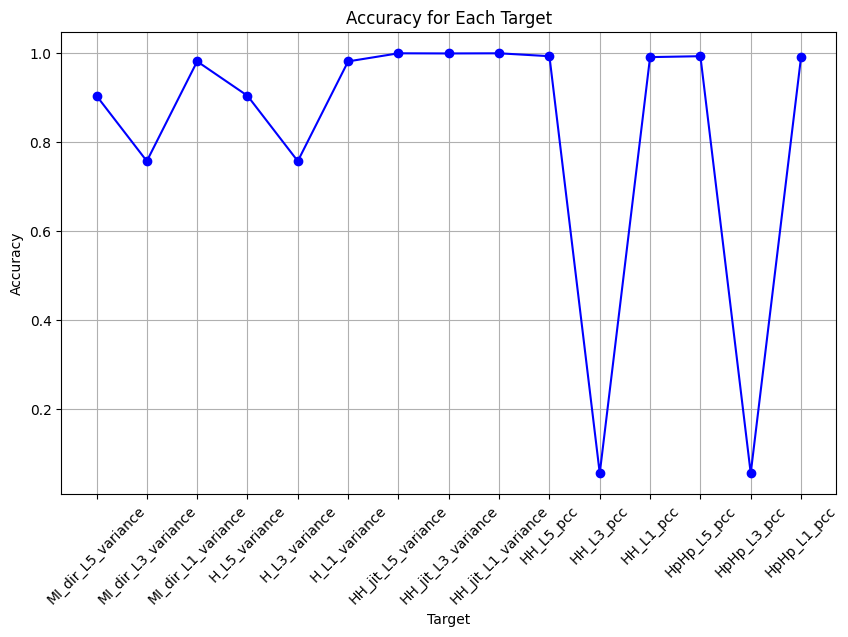

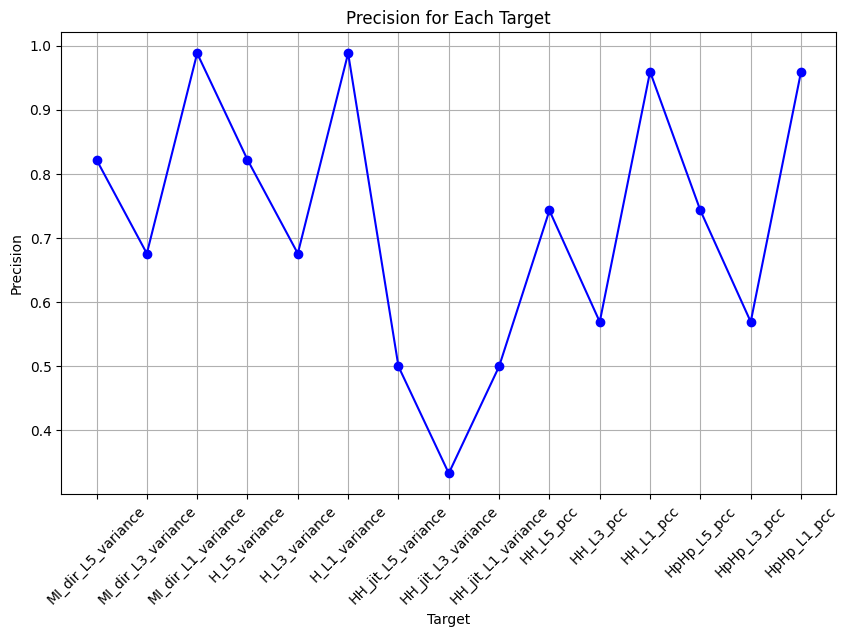

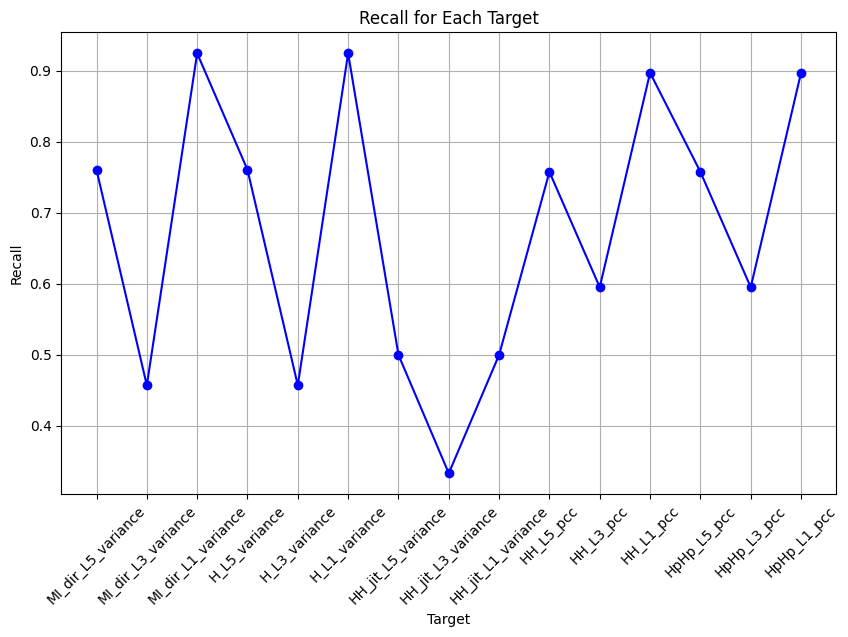

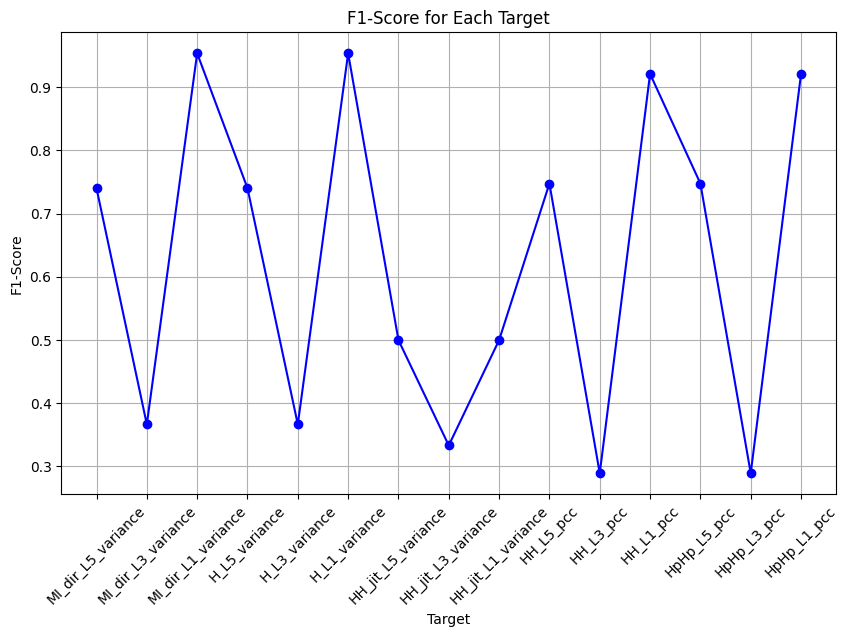

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Decision Tree model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97855611 0.98856326 0.98641887 0.98213009 0.97711016]
Mean Cross-Validation Accuracy: 0.9825556983784656
Validation Set Performance:
Accuracy: 0.9050886220697542
Precision: 0.8348252861527197
Recall: 0.7531249709634067
F1-Score: 0.7494638812334798
Test Set Performance:
Accuracy: 0.9066895368782161
Precision: 0.8305949653031707
Recall: 0.7620709704250724
F1-Score: 0.7409009456273514

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98856326 0.98856326 0.99070765 0.98927806 0.98712446]
Mean Cross-Validation Accuracy: 0.9888473373071507
Validation Set Performance:
Accuracy: 0.7409948542024014
Precision: 0.33617812800549024
Recall: 0.44207344379758173
F1-Score: 0.3566567004545565
Test Set Performance:
Accuracy: 0.7588336192109777
Precision: 0.3438098666267612
Recall: 0.4598559928509167
F1-Score: 0.3668948200099574

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98284489 0.98641887 0.98355969 0.97927091 0.98354793]
Mean Cross-Validation Accuracy: 0.9831284557434751
Validation Set Performance:
Accuracy: 0.9576901086335049
Precision: 0.9064412563914059
Recall: 0.9114769117358493
F1-Score: 0.9061493964142965
Test Set Performance:
Accuracy: 0.9835334476843911
Precision: 0.9609685126587819
Recall: 0.9253518378345458
F1-Score: 0.9423898987804836

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.97855611 0.98856326 0.98641887 0.98213009 0.97711016]
Mean Cross-Validation Accuracy: 0.9825556983784656
Validation Set Performance:
Accuracy: 0.9050886220697542
Precision: 0.8348252861527197
Recall: 0.7531249709634067
F1-Score: 0.7494638812334798
Test Set Performance:
Accuracy: 0.9066895368782161
Precision: 0.8305949653031707
Recall: 0.7620709704250724
F1-Score: 0.7409009456273514

--------------------------------------------------

Training 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98856326 0.98856326 0.99070765 0.98927806 0.98712446]
Mean Cross-Validation Accuracy: 0.9888473373071507
Validation Set Performance:
Accuracy: 0.7409948542024014
Precision: 0.33617812800549024
Recall: 0.44207344379758173
F1-Score: 0.3566567004545565
Test Set Performance:
Accuracy: 0.7588336192109777
Precision: 0.3438098666267612
Recall: 0.4598559928509167
F1-Score: 0.3668948200099574

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.98284489 0.98641887 0.98355969 0.97927091 0.98354793]
Mean Cross-Validation Accuracy: 0.9831284557434751
Validation Set Performance:
Accuracy: 0.9576901086335049
Precision: 0.9064412563914059
Recall: 0.9114769117358493
F1-Score: 0.9061493964142965
Test Set Performance:
Accuracy: 0.9835334476843911
Precision: 0.9609685126587819
Recall: 0.9253518378345458
F1-Score: 0.9423898987804836

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9992852 0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9995711222301644
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9996569468267581
Precision: 0.49982847341337905
Recall: 0.5
F1-Score: 0.49991422199348085

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9992852 0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9995711222301644
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9993138936535163
Precision: 0.3331046312178388
Recall: 0.3333333333333333
F1-Score: 0.3332189430336307

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.        0.9992852 0.9992852 0.9992852 1.       ]
Mean Cross-Validation Accuracy: 0.9995711222301644
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.9996569468267581
Precision: 0.49982847341337905
Recall: 0.5
F1-Score: 0.49991422199348085

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99571122 0.99571122 0.99356683 0.99285204 0.99499285]
Mean Cross-Validation Accuracy: 0.9945668324298677
Validation Set Performance:
Accuracy: 0.9931389365351629
Precision: 0.6417401764234162
Recall: 0.6543724966622163
F1-Score: 0.6479573058520427
Test Set Performance:
Accuracy: 0.9955403087478559
Precision: 0.9679458581073591
Recall: 0.8018597067156378
F1-Score: 0.8571247513105948

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99285204 0.99213724 0.99070765 0.99499643 0.99141631]
Mean Cross-Validation Accuracy: 0.9924219322814887
Validation Set Performance:
Accuracy: 0.9902801600914809
Precision: 0.6219591469360202
Recall: 0.6575516083471299
F1-Score: 0.6387822811952844
Test Set Performance:
Accuracy: 0.05797598627787307
Precision: 0.6052840579101679
Recall: 0.6218025444208269
F1-Score: 0.31521052535566374

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99571122 0.99642602 0.99571122 0.99070765 0.99642346]
Mean Cross-Validation Accuracy: 0.9949959147193838
Validation Set Performance:
Accuracy: 0.9925671812464265
Precision: 0.8439699838897537
Recall: 0.8203608979823813
F1-Score: 0.8313717598922051
Test Set Performance:
Accuracy: 0.9934819897084048
Precision: 0.9674136659005136
Recall: 0.9229274123598422
F1-Score: 0.940482991938326

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.99571122 0.99571122 0.99356683 0.99285204 0.99499285]
Mean Cross-Validation Accuracy: 0.9945668324298677
Validation Set Performance:
Accuracy: 0.9931389365351629
Precision: 0.6417401764234162
Recall: 0.6543724966622163
F1-Score: 0.6479573058520427
Test Set Performance:
Accuracy: 0.9955403087478559
Precision: 0.9679458581073591
Recall: 0.8018597067156378
F1-Score: 0.8571247513105948

--------------------------------------------------

Training mod

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99285204 0.99213724 0.99070765 0.99499643 0.99141631]
Mean Cross-Validation Accuracy: 0.9924219322814887
Validation Set Performance:
Accuracy: 0.9902801600914809
Precision: 0.6219591469360202
Recall: 0.6575516083471299
F1-Score: 0.6387822811952844
Test Set Performance:
Accuracy: 0.05797598627787307
Precision: 0.6052840579101679
Recall: 0.6218025444208269
F1-Score: 0.31521052535566374

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99571122 0.99642602 0.99571122 0.99070765 0.99642346]
Mean Cross-Validation Accuracy: 0.9949959147193838
Validation Set Performance:
Accuracy: 0.9925671812464265
Precision: 0.8439699838897537
Recall: 0.8203608979823813
F1-Score: 0.8313717598922051
Test Set Performance:
Accuracy: 0.9934819897084048
Precision: 0.9674136659005136
Recall: 0.9229274123598422
F1-Score: 0.940482991938326

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.8260491709548313
Average Precision: 0.7123196954038739
Average Recall: 0.6880713508364678
Average F1-Score: 0.6439370168710231


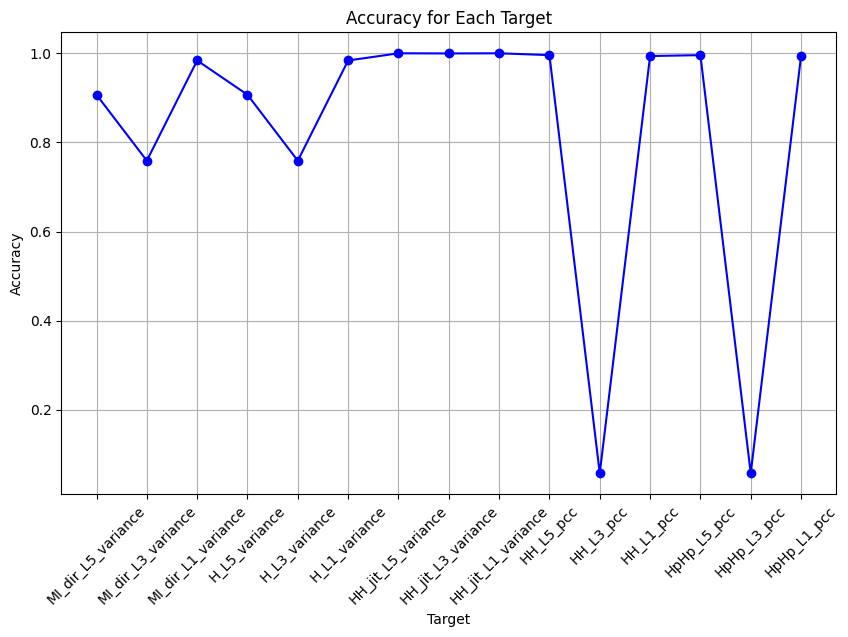

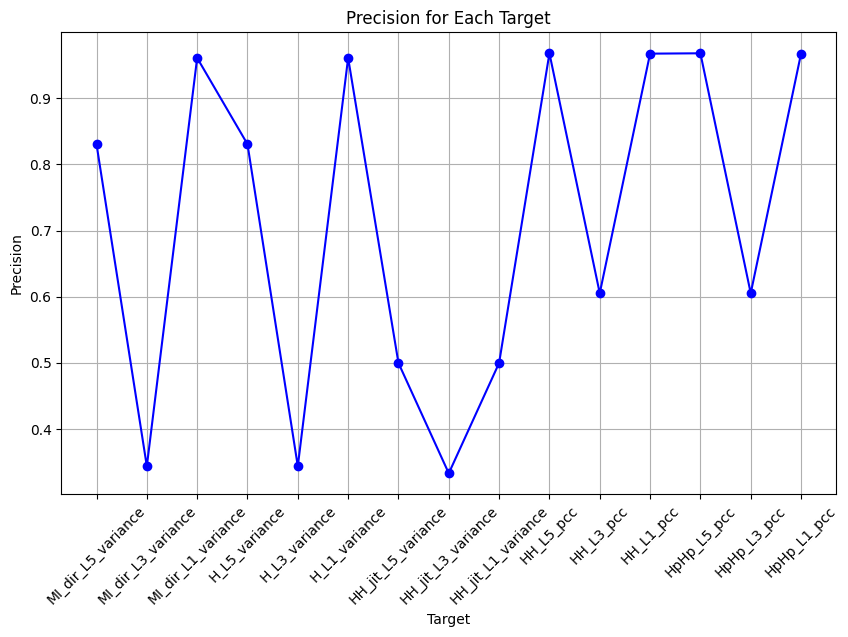

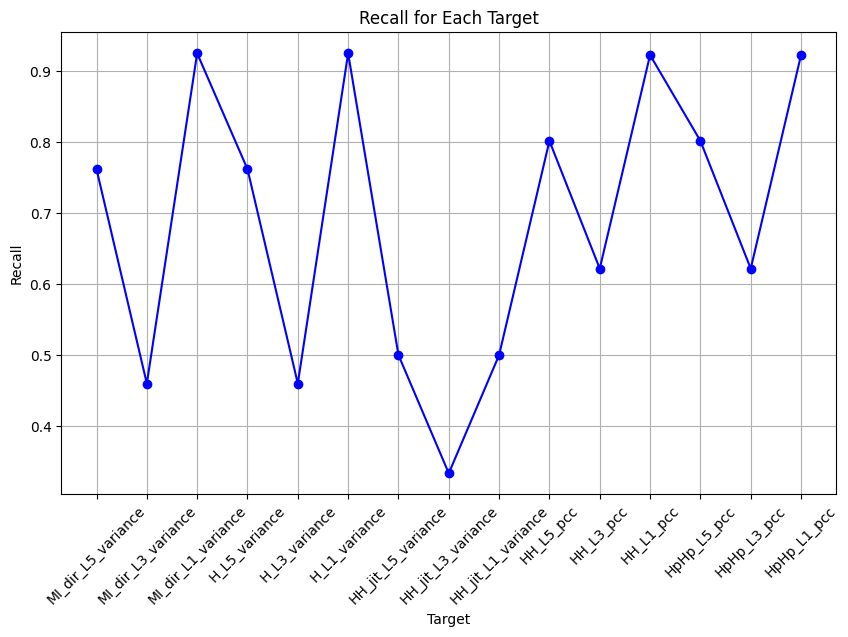

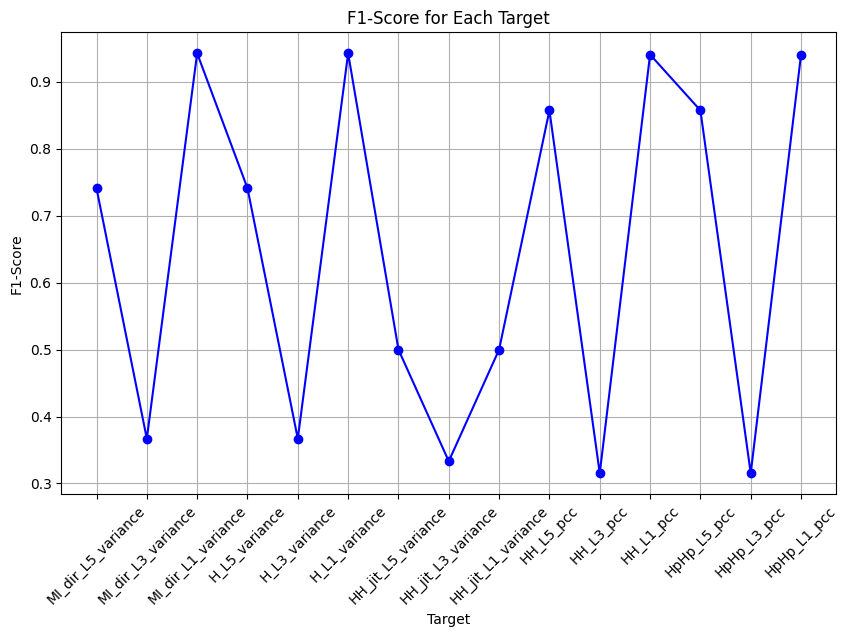

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

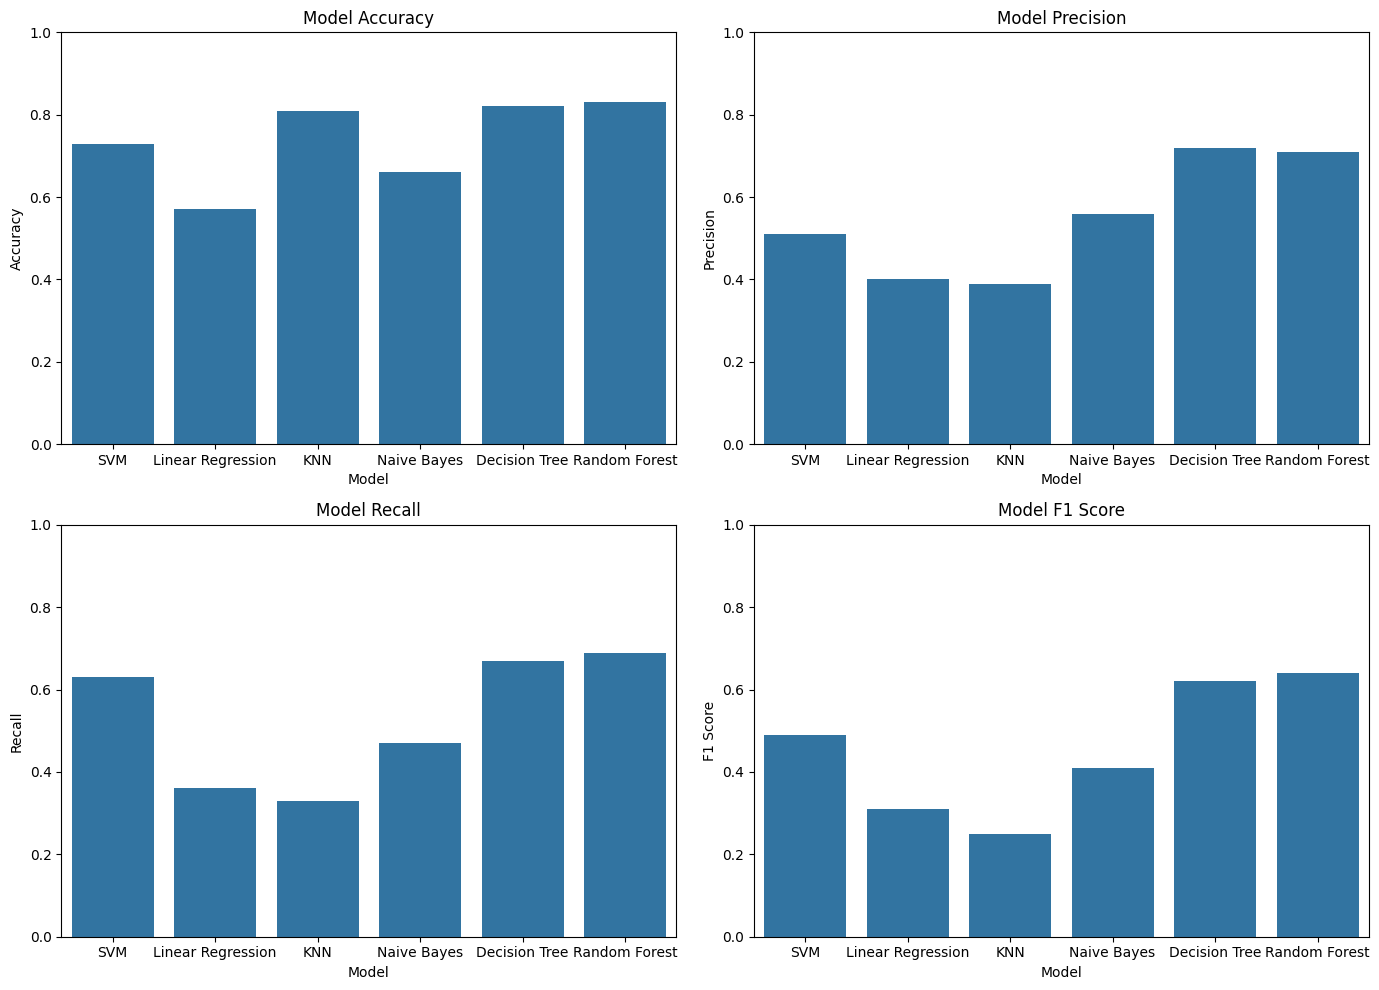

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.73, 0.57, 0.81, 0.66, 0.82, 0.83],
    'Precision': [0.51, 0.40, 0.39,0.56 ,0.72, 0.71],
    'Recall': [0.63, 0.36, 0.33, 0.47, 0.67, 0.69],
    'F1 Score': [0.49, 0.31, 0.25, 0.41, 0.62, 0.64]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()